# HMW2 Exercises RQ1 To RQ6 + CQ1 and CQ2

Import info: below we will list the blocks (we suppose that all the file has been ran only once) in which you should change the path (put the path where the data is stored) in order to upoad the files:

RQ1:

cell 1: 

# Exercise RQ1:

Who wants to be a Champion? 
Create a plot where each point (x,y) represents the number of points obtained by team x at game week y
Highlight the two teams that got the longest winning streak (# of consecutive wins), and the two teams that got the longest losing streak (# of consecutive losses).

In [1]:
import pandas as pd 
import numpy as np
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches_df = pd.read_json('./Dataset/matches/matches_England.json' )

In [3]:
matches_df.head(5)

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [4]:
matches_df.columns

Index(['competitionId', 'date', 'dateutc', 'duration', 'gameweek', 'label',
       'referees', 'roundId', 'seasonId', 'status', 'teamsData', 'venue',
       'winner', 'wyId'],
      dtype='object')

In [5]:
# Drop unused columns from original dataframe
matches_df=matches_df.drop(columns=['competitionId','date', 'dateutc', 'duration',
    'referees', 'roundId', 'seasonId','venue','wyId','teamsData'])
matches_df.head(5)

,gameweek,label,status,winner
0,38,"Burnley - AFC Bournemouth, 1 - 2",Played,1659
1,38,"Crystal Palace - West Bromwich Albion, 2 - 0",Played,1628
2,38,"Huddersfield Town - Arsenal, 0 - 1",Played,1609
3,38,"Liverpool - Brighton & Hove Albion, 4 - 0",Played,1612
4,38,"Manchester United - Watford, 1 - 0",Played,1611


### Split the label


In [6]:
#split it to team1 team2 score1 score2 
matches_df['label'][0]

'Burnley - AFC Bournemouth, 1 - 2'

In [7]:
#str.split(pat=None, n=-1, expand=False)
lb=matches_df.label.str.split("-" , expand=True)
lb.head(5)

,0,1,2
0,Burnley,"AFC Bournemouth, 1",2
1,Crystal Palace,"West Bromwich Albion, 2",0
2,Huddersfield Town,"Arsenal, 0",1
3,Liverpool,"Brighton & Hove Albion, 4",0
4,Manchester United,"Watford, 1",0


In [8]:
lb.columns=['Team1','Team2','score2']
lb['Team1']=lb['Team1'].str.strip()
lb['score2']=lb['score2'].str.strip()

In [9]:
lb.head(5)

,Team1,Team2,score2
0,Burnley,"AFC Bournemouth, 1",2
1,Crystal Palace,"West Bromwich Albion, 2",0
2,Huddersfield Town,"Arsenal, 0",1
3,Liverpool,"Brighton & Hove Albion, 4",0
4,Manchester United,"Watford, 1",0


In [10]:
lb2 =lb.Team2.str.split(',', expand=True)
lb2.head(5)

,0,1
0,AFC Bournemouth,1
1,West Bromwich Albion,2
2,Arsenal,0
3,Brighton & Hove Albion,4
4,Watford,1


In [11]:
lb2.columns=["Team 2","score1"]
lb2['Team 2']=lb2['Team 2'].str.strip()
lb2['score1']=lb2['score1'].str.strip()
lb2.head(5)

,Team 2,score1
0,AFC Bournemouth,1
1,West Bromwich Albion,2
2,Arsenal,0
3,Brighton & Hove Albion,4
4,Watford,1


In [12]:
label=pd.concat([lb,lb2], axis=1)

In [13]:
label=label.drop(columns=['Team2'])
# Unnecessary column due to spliting the labels

In [14]:
label.head(5)

,Team1,score2,Team 2,score1
0,Burnley,2,AFC Bournemouth,1
1,Crystal Palace,0,West Bromwich Albion,2
2,Huddersfield Town,1,Arsenal,0
3,Liverpool,0,Brighton & Hove Albion,4
4,Manchester United,0,Watford,1


In [15]:
#Rearranging the col
label=label[['Team1',"score1",'Team 2','score2']]
label.head(5)

,Team1,score1,Team 2,score2
0,Burnley,1,AFC Bournemouth,2
1,Crystal Palace,2,West Bromwich Albion,0
2,Huddersfield Town,0,Arsenal,1
3,Liverpool,4,Brighton & Hove Albion,0
4,Manchester United,1,Watford,0


In [16]:
label.head(5)

,Team1,score1,Team 2,score2
0,Burnley,1,AFC Bournemouth,2
1,Crystal Palace,2,West Bromwich Albion,0
2,Huddersfield Town,0,Arsenal,1
3,Liverpool,4,Brighton & Hove Albion,0
4,Manchester United,1,Watford,0


In [17]:
#conect all
matches_df=pd.concat([matches_df , label ], axis=1)

In [18]:
matches_df=matches_df.drop(columns=['label'])

In [19]:
matches_df.head(10)

,gameweek,status,winner,Team1,score1,Team 2,score2
0,38,Played,1659,Burnley,1,AFC Bournemouth,2
1,38,Played,1628,Crystal Palace,2,West Bromwich Albion,0
2,38,Played,1609,Huddersfield Town,0,Arsenal,1
3,38,Played,1612,Liverpool,4,Brighton & Hove Albion,0
4,38,Played,1611,Manchester United,1,Watford,0
5,38,Played,1613,Newcastle United,3,Chelsea,0
6,38,Played,1625,Southampton,0,Manchester City,1
7,38,Played,1639,Swansea City,1,Stoke City,2
8,38,Played,1624,Tottenham Hotspur,5,Leicester City,4
9,38,Played,1633,West Ham United,3,Everton,1


### Now calculate the points 


In [20]:
#calculate the points , add two columns for both teams 
matches_df["Points1"]=0
matches_df["Points2"]=0

In [21]:
#winner 3 , loser 0 ,tie 1 for both 
# for i in range(len(matches_df)):
#     if score1>score2:
#         insert 3 in point1
#     elif score1<score2:
#         insert 3 in points2
#     elif score1==score2:
#         insert 1 in point 1 and point2  

for i in range(len(matches_df)):
    if matches_df.score1.iloc[i]>matches_df.score2.iloc[i]:
        matches_df.Points1.iloc[i]=3
    elif matches_df.score1.iloc[i]<matches_df.score2.iloc[i]:
        matches_df.Points2.iloc[i]=3
    elif matches_df.score1.iloc[i] == matches_df.score2.iloc[i]:
        matches_df.Points1.iloc[i]=1
        matches_df.Points2.iloc[i]=1
        
    

/Users/Dario/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
matches_df.head(10)

,gameweek,status,winner,Team1,score1,Team 2,score2,Points1,Points2
0,38,Played,1659,Burnley,1,AFC Bournemouth,2,0,3
1,38,Played,1628,Crystal Palace,2,West Bromwich Albion,0,3,0
2,38,Played,1609,Huddersfield Town,0,Arsenal,1,0,3
3,38,Played,1612,Liverpool,4,Brighton & Hove Albion,0,3,0
4,38,Played,1611,Manchester United,1,Watford,0,3,0
5,38,Played,1613,Newcastle United,3,Chelsea,0,3,0
6,38,Played,1625,Southampton,0,Manchester City,1,0,3
7,38,Played,1639,Swansea City,1,Stoke City,2,0,3
8,38,Played,1624,Tottenham Hotspur,5,Leicester City,4,3,0
9,38,Played,1633,West Ham United,3,Everton,1,3,0


In [23]:
#rearranging the cols order
matches_df=matches_df[["gameweek",'status','winner','Team1' ,'Points1','Team 2' ,'Points2']]

In [24]:
matches_df.sort_values(by='gameweek')

,gameweek,status,winner,Team1,Points1,Team 2,Points2
379,1,Played,1609,Arsenal,3,Leicester City,0
370,1,Played,1611,Manchester United,3,West Ham United,0
371,1,Played,1624,Newcastle United,0,Tottenham Hotspur,3
372,1,Played,1625,Brighton & Hove Albion,0,Manchester City,3
373,1,Played,1646,Chelsea,0,Burnley,3
378,1,Played,0,Watford,1,Liverpool,1
375,1,Played,1623,Everton,3,Stoke City,0
376,1,Played,0,Southampton,1,Swansea City,1
377,1,Played,1627,West Bromwich Albion,3,AFC Bournemouth,0
374,1,Played,1673,Crystal Palace,0,Huddersfield Town,3


In [25]:
#Now we need table for all teams(both1 and 2) and their points per week
teams1 = matches_df[['gameweek','Team1','Points1']]
teams1.head(11)

,gameweek,Team1,Points1
0,38,Burnley,0
1,38,Crystal Palace,3
2,38,Huddersfield Town,0
3,38,Liverpool,3
4,38,Manchester United,3
5,38,Newcastle United,3
6,38,Southampton,0
7,38,Swansea City,0
8,38,Tottenham Hotspur,3
9,38,West Ham United,3


In [26]:
#rename to concat later 
teams1.columns=['gameweek','Team','Points']
teams1.head(5)

,gameweek,Team,Points
0,38,Burnley,0
1,38,Crystal Palace,3
2,38,Huddersfield Town,0
3,38,Liverpool,3
4,38,Manchester United,3


In [27]:
teams2 = matches_df[['gameweek','Team 2','Points2']]
#rename to concat 
teams2.columns=['gameweek','Team','Points']
teams2.head(11)

,gameweek,Team,Points
0,38,AFC Bournemouth,3
1,38,West Bromwich Albion,0
2,38,Arsenal,3
3,38,Brighton & Hove Albion,0
4,38,Watford,0
5,38,Chelsea,0
6,38,Manchester City,3
7,38,Stoke City,3
8,38,Leicester City,0
9,38,Everton,0


In [28]:
points_team=pd.concat([teams1, teams2], axis=0)
points_team=points_team.groupby(['gameweek','Team']).sum()
#groupby loses cols! so reset index
points_team=points_team.reset_index()


In [29]:
points_team.head(5)

,gameweek,Team,Points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0


In [30]:
allTeams=list(points_team.Team.unique())

In [31]:
allTeams

['AFC Bournemouth',
 'Arsenal',
 'Brighton & Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Huddersfield Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Southampton',
 'Stoke City',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

In [32]:
weeks=range(0,39)
#create new dataframe with columns the number of weeks, rows each team and their point per week
#Easier to plot 
thePlot=pd.DataFrame(index=allTeams, columns=weeks)
thePlot[0]=0 # week 0 fill it with 0
thePlot[:5]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
AFC Bournemouth,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arsenal,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brighton & Hove Albion,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burnley,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chelsea,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Populate the plot
for i in allTeams:
    for x in range(1,39):
        t=points_team.loc[(points_team['gameweek'] == x)&(points_team['Team']== i),'Points'] #for every corresponding to the same number of week and same team(put its points instead)
        thePlot.loc[i,x] =thePlot.loc[i,x-1]+int(t) 
        #fill the current cell with the corresponding name of team & week number and keep passing the points obtaind from previous weeks -x to the next

In [34]:
thePlot.head(3)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
AFC Bournemouth,0,0,0,0,0,3,3,4,4,7,...,33,33,36,37,38,38,38,38,41,44
Arsenal,0,3,3,3,6,7,10,13,13,16,...,45,48,48,51,54,54,57,57,60,63
Brighton & Hove Albion,0,0,0,1,4,4,7,7,8,11,...,34,34,34,34,35,35,36,37,40,40


### The two teams with lowest and the highest performance in the final week

In [35]:
#convert the plot of points per week and teams name to dict

d = thePlot.to_dict() #key > the number of the week #values > teams+points

teams_score_dict = d[38] #Interested only on final week points

sorted_teams_score_dict = sorted(teams_score_dict.items(), key = lambda kv:(kv[1], kv[0]))#sort the dict of week 38  
#Best Two and lowest Two
first_team = sorted_teams_score_dict[-1]
second_team = sorted_teams_score_dict[-2]
last_team = sorted_teams_score_dict[0]
second_last_team = sorted_teams_score_dict[1]

print(f"1: {first_team}, 2: {second_team}, 37: {second_last_team}, 38: {last_team}")

1: ('Manchester City', 100), 2: ('Manchester United', 81), 37: ('Stoke City', 33), 38: ('West Bromwich Albion', 31)


### Consecutive  losses and Consecutive wins

In [36]:
from itertools import groupby

def cons_lose(x):return sum (1 for i in x)

#-----------------------------------
def cons_lose_(tableData):
    
    list_=list(cons_lose(index) for value , index in groupby(tableData) if value ==0 )
    

#     for value , index in groupby(tableData):
#         if value==0:
#             cons_lose(index)

    if len(list_)== 0: #no consecutives zeros
        return 0
    else: 
        return max(list_)
#grouby: takes a list of iterables and groups them based on a key here is [points] and its v == 0
#if v==0 pass the index to function cons_lose [1 ,1, .... ] keep passing
#fill the list_[] with 1 everytime 0 is encountered 

In [37]:
#to get only the teams name and the count of consecutive zeros
losses=points_team.groupby(["Team"])
losses=(losses.apply(lambda losses: cons_lose_(losses["Points"]))).sort_values(ascending=False)
losses.head(2)

Team
West Bromwich Albion    8
Crystal Palace          7
dtype: int64

In [38]:
from itertools import groupby

def cons_win(x):return sum (1 for i in x)

#-----------------------------------
def cons_win_(tableData):
    
    list_=list(cons_win(index) for value , index in groupby(tableData) if value == 3 )
    

#     for value , index in groupby(tableData):
#         if value==3:
#             pass to cons_win(index)

    if len(list_)== 0: 
        return 0 #no consecutives 3
    else: 
        return max(list_)
#grouby: takes a list of iterables and groups them based on a key here is points and v==3
#if v==3 pass the index 

In [39]:
#to get only the teams name and the count of consecutive 3
wins=points_team.groupby(["Team"]) 
wins=(wins.apply(lambda wins: cons_win_(wins["Points"]))).sort_values(ascending=False)
wins.head(2)

Team
Manchester City      18
Tottenham Hotspur     7
dtype: int64

Text(0.5, 0, 'Weeks')

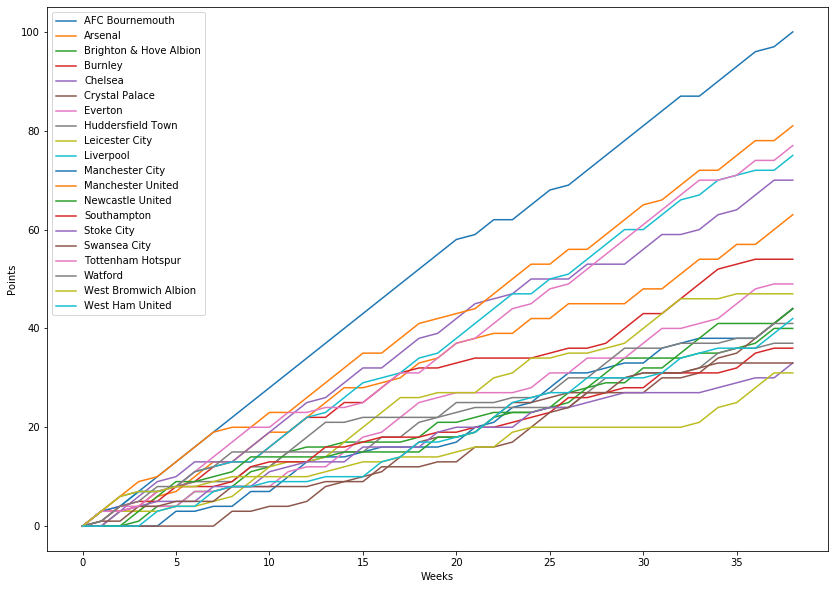

In [40]:
from matplotlib.pyplot import figure
#total points
#X= weeks
#Y=points
#aresenal(1,3)
#arsenal(2,1)
plt.figure(figsize=(14,10))
fig=plt.plot(weeks,thePlot.T)
plt.legend(thePlot.T.columns)
plt.ylabel("Points")
plt.xlabel("Weeks")


The plot shows the performance of each team in PL , as shown, the best performance in PL is Manchester city in the blue line that peaks , while the lowest performance the decreased line West Bromwich Albion espacillly in the week 25 to week 30 showing the stable non increasing line

In [41]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Exercise RQ 2:

### Import Libraries

In [42]:
import json
import pandas as pd
from pandas.io.json import json_normalize
from collections import defaultdict
from collections import Counter
from scipy.stats import chi2_contingency

### Opening Dataset: I extract only the winner teams, putting them in a list.

In [43]:
df_matchesEn=json.load(open("./Dataset/matches/matches_England.json"))
Winner=[]
for elem in range(380):
    Competition=df_matchesEn[elem]
    winner=Competition['winner']
    Winner+=[winner]

### Cleaning Dataset (part 1) :  I extract all the teams, dividing them in team[0] and team[1], for all the matches. I split them in Home Team and Away Team 	through a if/else conditions that allow to identify if the team is the Home team or not.

In [44]:
TeamsData=[]
Home=[]
Away=[]
for i in range(380):
    Competition=df_matchesEn[i]
    teamsData=Competition['teamsData']
    teamsData=list(teamsData.keys())
    Team0=teamsData[0]
    Team1=teamsData[1]
    
    if Competition['teamsData'][Team0]['side']=='home':
        Home+=[Team0]
    else:
        Away+=[Team0]
    if Competition['teamsData'][Team1]['side']=='home':
        Home+=[Team1]
    else:
        Away+=[Team1]

### Create a new DF:  I zip all the list created before, to make a unique table with Home(team)-Away(team)-Winner(of the match) for all the matches; this is the df_1 (DataFrame). 

In [45]:
df_1=list(zip(Home,Away,Winner))
df_1=pd.DataFrame(df_1,columns=['HomeTeam','AwayTeam','Winner'])

df_1.head()

,HomeTeam,AwayTeam,Winner
0,1646,1659,1659
1,1628,1627,1628
2,1673,1609,1609
3,1612,1651,1612
4,1611,1644,1611


### Sorting the DF and selecting only 5 teams

In [46]:
df_H=df_1.sort_values(['HomeTeam','AwayTeam','Winner'], ascending=[True, False,False])
df_A=df_1.sort_values(['AwayTeam','HomeTeam','Winner'], ascending=[True, False,False])
df_H=df_H.reset_index()
df_A=df_A.reset_index()
df=df_H.join(df_A,lsuffix='_x',rsuffix='_y')
df=df[:95]

df.head()

,index_x,HomeTeam_x,AwayTeam_x,Winner_x,index_y,HomeTeam_y,AwayTeam_y,Winner_y
0,307,10531,1673,10531,85,1673,10531,0
1,257,10531,1659,0,20,1659,10531,1659
2,278,10531,1651,1651,105,1651,10531,1651
3,117,10531,1646,10531,264,1646,10531,1646
4,328,10531,1644,1644,179,1644,10531,10531


I sort the df_1 before through the column 'HomeTeam' --> df_H, after for the column 'AwayTeam'-->df_A. So I join them, I reset index and I slice this dataframe from 0 to 95, to have only the match played by  5 teams-->df

In [47]:
ST=[]
WA=[]
WH=[]
DA=[]
DH=[]
LA=[]
LH=[]
DT_TOTAL=[]
for i in range(0,95,19):
    search_team=df['HomeTeam_x'][i]        
    ST+=[search_team]                   
    winner_away=df['Winner_x'][i:i+19]    
    winner_home=df['Winner_y'][i:i+19]
    conta_away=(Counter(winner_away))
    win_away=conta_away[int(search_team)]
    WA+=[win_away]
    draw_away=conta_away[0]
    DA+=[draw_away]
    lose_away=19-win_away-draw_away
    LA+=[lose_away]
    conta_home=(Counter(winner_home))
    win_home=conta_home[int(search_team)]
    WH+=[win_home]
    draw_home=conta_home[0]
    DH+=[draw_home]
    lose_home=19-win_home-draw_home
    LH+=[lose_home]
    DT1=pd.DataFrame({'Team':[search_team],'Home':[win_home,draw_home,lose_home],'Away':[win_away,draw_away,lose_away],'Total':
                      [win_home+win_away,draw_home+draw_away,lose_home+lose_away],'F_Home':[win_home/(win_home+win_away),
                                                                                           draw_home/(draw_home+draw_away),
                                                                                           lose_home/(lose_home+lose_away)],
                     'F_Away':[win_away/(win_home+win_away),draw_away/(draw_home+draw_away),lose_away/(lose_home+lose_away)]},
                     index= ['WIN','DRAW','LOSE'])
    DT_TOTAL+=[DT1]
    

### Contingency Table No1

In [48]:
DT_TOTAL[0]

,Team,Home,Away,Total,F_Home,F_Away
WIN,10531,2,6,8,0.250000,0.750000
DRAW,10531,6,3,9,0.666667,0.333333
LOSE,10531,11,10,21,0.523810,0.476190


### Contingency Table No2

In [49]:
DT_TOTAL[1]

,Team,Home,Away,Total,F_Home,F_Away
WIN,1609,4,15,19,0.210526,0.789474
DRAW,1609,4,2,6,0.666667,0.333333
LOSE,1609,11,2,13,0.846154,0.153846


### Contingency Table No3

In [50]:
DT_TOTAL[2]

,Team,Home,Away,Total,F_Home,F_Away
WIN,1610,10,11,21,0.476190,0.523810
DRAW,1610,3,4,7,0.428571,0.571429
LOSE,1610,6,4,10,0.600000,0.400000


### Contingency Table No4

In [51]:
DT_TOTAL[3]

,Team,Home,Away,Total,F_Home,F_Away
WIN,1611,10,15,25,0.400000,0.600000
DRAW,1611,4,2,6,0.666667,0.333333
LOSE,1611,5,2,7,0.714286,0.285714


### Contingency Table No5

In [52]:
DT_TOTAL[4]

,Team,Home,Away,Total,F_Home,F_Away
WIN,1612,9,12,21,0.428571,0.571429
DRAW,1612,5,7,12,0.416667,0.583333
LOSE,1612,5,0,5,1.000000,0.000000


## Final 

In [53]:
Home=[WH,DH,LH]
Away=[WA,DA,LA]
Home_n=[]
Away_n=[]
for elem in Home:
    elem=sum(elem)
    Home_n+=[elem]
for elem in Away:
    elem=sum(elem)
    Away_n+=[elem]
Away=pd.DataFrame(Away_n,columns=['Away'],index=['WIN','DRAW','LOSE'])
Home=pd.DataFrame(Home_n,columns=['Home'],index=['WIN','DRAW','LOSE']) 
TOT=Home.join(Away)
chi2, p, dof, ex = chi2_contingency([TOT['Home'],TOT['Away']])

TOT

,Home,Away
WIN,35,59
DRAW,22,18
LOSE,38,18


In [54]:
chi2

13.670516717325226

In [55]:
p

0.0010751894948449615

In [56]:
ex

array([[47., 20., 28.],
       [47., 20., 28.]])

In [57]:
dof

2

### So we reject the H0 hypotesis and we accept H1. But the correlation is opposite respect of the expected result. 

# Exercise RQ 3:

### Import Libraries

In [58]:
import json
import pandas as pd
from pandas.io.json import json_normalize
from collections import defaultdict
import matplotlib.pyplot as plt

### Opening Dataset

In [59]:
df_matchesEn=json.load(open("./Dataset/matches/matches_England.json"))
df_teamsId=json_normalize(df_matchesEn,'teamsData',errors='ignore')

### Cleaning Dataframe (part 1): create a new DF with wyId (for the coach) and theirs Team

In [60]:
TeamsData=[]
for i in range(380):
    teamsData=df_matchesEn[i]['teamsData']
    TeamsData+=[teamsData]
d = defaultdict(list)
for elem in TeamsData:
    key=list(elem.keys())
    key=key[0]
    coach=elem[key]['coachId']
    team=elem[key]['teamId']
    d[team].append(coach)
for elem in TeamsData:
    key=list(elem.keys())
    key=key[1]
    coach=elem[key]['coachId']
    team=elem[key]['teamId']
    d[team].append(coach)
K=list(d.keys())
V=list(d.values())
n_V=[]  
for elem in V:
    elem=set(elem)
    elem=list(elem)
    if '0' in elem:
        elem.remove('0')
    elif 0 in elem:
        elem.remove(0)
    n_V+=[elem]
risultato=list(zip(K,n_V))
df=pd.DataFrame(risultato,columns=['Team','Coach'])
T=df['Team']
C=df['Coach']
df.set_index('Team',inplace=True)
S=[]
C=[]
for elem in T:
    A=(df['Coach'][elem])
    for i in A:
        C+=[i]
        S+=[elem]
Final=(list(zip(C,S)))
df=pd.DataFrame(Final,columns=['wyId','Team'])


In [61]:
df.head()

,wyId,Team
0,8880,1646
1,8357,1628
2,268775,1628
3,7845,1609
4,8093,1651


### Cleaning Dataframe (part 2): create a new DF with wyId(for each coach) and theirs birthDate

In [62]:
df_coaches=json.load(open("./Dataset/coaches.json"))
df_coaches=json_normalize(df_coaches)
birthDate=df_coaches['birthDate']
wyId=df_coaches['wyId']
shortName=df_coaches['shortName']
results=list(zip(birthDate,wyId,shortName))
df_coaches_new=pd.DataFrame(results,columns=['birthDate','wyId','shortName'])
df_ordered=df_coaches_new.sort_values(["birthDate", "wyId",'shortName'], ascending=[False, False,False])
df_ordered.set_index('wyId',inplace=True)

C.remove(3782)
R=[]
for elem in C:
    r=df_ordered['birthDate'][elem]
    R+=[r]
prova=list(zip(C,R))   
prova=pd.DataFrame(prova,columns=['wyId','birthDate'])

df=df[~df.index.isin([29])]

prova.head()

,wyId,birthDate
0,8880,1971-06-28
1,8357,1947-08-09
2,268775,1970-05-15
3,7845,1949-10-22
4,8093,1958-12-11


### Create a unique DF: merging the wyId-Team and wyId-birthData

In [63]:
P2=pd.merge(prova,df,on='wyId')
P2=P2.sort_values(["birthDate", "wyId",'Team'], ascending=[False, False,False])
P2.head()

,wyId,birthDate,Team
31,8934,1977-11-29,1659
6,71037,1977-07-12,1644
14,8214,1975-12-04,1631
15,434992,1973-10-16,1623
7,531745,1973-02-19,1613


### Arranging the DF:  I add the teams' names at DF

In [64]:
df_teams=json.load(open("./Dataset/teams.json"))
df_teams=json_normalize(df_teams)
df_wyId=df_teams['wyId']
df_name=df_teams['name']
new=list(zip(df_wyId,df_name))
df2=pd.DataFrame(new,columns=['wyId','NameTeam'])
df2=df2.sort_values(["wyId",'NameTeam'], ascending=[False, False])
df2.set_index('wyId',inplace=True)
R2=[]
for elem in T:
    r=df2['NameTeam'][elem]
    R2+=[r]
prova2=list(zip(T,R2))   
prova2=pd.DataFrame(prova2,columns=['Team','NameTeam'])
P3=pd.merge(P2,prova2,on='Team')
P3=P3.sort_values(['birthDate', "wyId",'Team','NameTeam'], ascending=[False, False,False,False])

P3=P3.reset_index()
P3.head(10)

,index,wyId,birthDate,Team,NameTeam
0,0,8934,1977-11-29,1659,AFC Bournemouth
1,1,71037,1977-07-12,1644,Watford
2,3,8214,1975-12-04,1631,Leicester City
3,6,434992,1973-10-16,1623,Everton
4,9,531745,1973-02-19,1613,Newcastle United
5,11,292863,1972-03-02,1624,Tottenham Hotspur
6,12,381291,1972-01-08,10531,Swansea City
7,14,18572,1971-10-19,1673,Huddersfield Town
8,15,254174,1971-10-05,1619,Southampton
9,18,8880,1971-06-28,1646,Burnley


### Arranging the DF:  I add the coaches' ages to DF

In [65]:
Age=P3['birthDate']
Age_1=[]
import datetime
today = datetime.date.today()
today = list(map(int,(str(today).split('-'))))
today=today[0]
for i in Age:
    i=list(map(int,(i.split('-'))))
    i=i[0]
    r=(today-i)
    Age_1+=[r]
    
Age_1=pd.DataFrame(Age_1,columns=['Age'])
P4=P3.join(Age_1)

P4.head()

,index,wyId,birthDate,Team,NameTeam,Age
0,0,8934,1977-11-29,1659,AFC Bournemouth,42
1,1,71037,1977-07-12,1644,Watford,42
2,3,8214,1975-12-04,1631,Leicester City,44
3,6,434992,1973-10-16,1623,Everton,46
4,9,531745,1973-02-19,1613,Newcastle United,46


### Final: Generate the Boxplot 

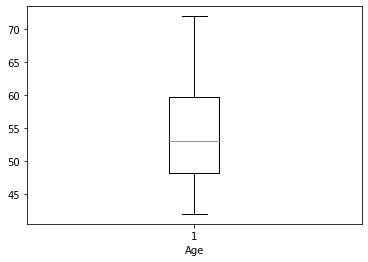

In [66]:
plt.boxplot(P4.Age.unique())
plt.xlabel("Age")
plt.show()

In [67]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Exercise RQ4:

#### Find the top 10 players with the highest ratio between completed passes and attempted passes. For this task, consider all the different types of passes, and as specified in the website, a completed pass has tag 1801 (accurate event).


In [68]:
import json 
import pandas as pd
import numpy as np
from collections import OrderedDict
import math

In [69]:
# Import the DF events, where I can find the required info:

In [70]:
with open('./Dataset/Events/events_England.json') as f:
    events_en = pd.io.json.loads(f.read())

events_en_df = pd.DataFrame(events_en) 
events_en_df.head(n=5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [71]:
# Let's create a DF with only the event in which I am intereseted in (pass):

In [72]:
events_en_df = events_en_df[events_en_df["eventName"].str.contains("Pass")]
events_en_df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [73]:
# Let's cleand the DF, we don't need eventId, eventSec, matchId, matchPeriod, positions, teamId:

In [74]:
events_en_df = events_en_df.drop(columns = ["eventId", "eventSec", "matchId", "matchPeriod", "positions", "teamId"])
events_en_df.head(n=5)

,eventName,id,playerId,subEventId,subEventName,tags
0,Pass,177959171,25413,85,Simple pass,[{'id': 1801}]
1,Pass,177959172,370224,83,High pass,[{'id': 1801}]
2,Pass,177959173,3319,82,Head pass,[{'id': 1801}]
3,Pass,177959174,120339,82,Head pass,[{'id': 1801}]
4,Pass,177959175,167145,85,Simple pass,[{'id': 1801}]


In [75]:
# Let's create a column with the tags we need:

In [76]:
tags = []
for i in range(events_en_df.shape[0]): # Let's create a list with the elements of the column tags (I can skip this passage, but to be clearer I do it)
    tags.append(events_en_df.iloc[i, 5])
        
is_correct = [] # I am interested in only two elements: completed pass = 1801 and tot passes = com.pass + notComp.pass (1802)
for i in range(len(tags)):
    for j in range(len(tags[i])):
        d = tags[i][j]
        if d['id'] == 1801 or d['id'] == 1802: # I add to my final list only the one element, so I can create the df
            is_correct.append(d['id'])

events_en_df['passResult'] = is_correct # Let's add the column to the DF
events_en_df.drop(columns = ['tags'], inplace = True) # Let's delete the column tags
events_en_df.head(n=10)

,eventName,id,playerId,subEventId,subEventName,passResult
0,Pass,177959171,25413,85,Simple pass,1801
1,Pass,177959172,370224,83,High pass,1801
2,Pass,177959173,3319,82,Head pass,1801
3,Pass,177959174,120339,82,Head pass,1801
4,Pass,177959175,167145,85,Simple pass,1801
5,Pass,177959177,3319,85,Simple pass,1802
6,Pass,177959186,8653,82,Head pass,1801
9,Pass,177959178,167145,82,Head pass,1801
10,Pass,177959179,49876,82,Head pass,1801
11,Pass,177959180,14869,83,High pass,1801


In [77]:
# Let's create a dictionary that contains each player, the number of correct pass and total number of pass:

In [78]:
players = events_en_df['playerId'].unique()

group_tot = events_en_df.groupby(['playerId']).count() # Let's calculate the total passes for each player
group_tot.reset_index(level=0, inplace=True)  # I want that playerId is a column not the index
group_tot.drop(group_tot.iloc[:, 1:5], inplace =True, axis = 1) # Let's keep only the column playerId and passResult
group_tot.columns = ["playerId", "totPasses"]
group_tot.sort_values(by = ["playerId"], inplace = True)
group_tot.head()

,playerId,totPasses
0,0,6
1,36,898
2,38,224
3,48,2370
4,54,2196


In [79]:
pas = {} # let's get the completed score for each player

for i in players: # Firstly I create a dictionary with all footballers
    pas.update({i:[]})
    
for x in pas: # for each player
    for i in range(events_en_df.shape[0]):       
        if x == events_en_df.iloc[i,2]: # if the row in the main DF corresponds to that player
            pas[x].append(events_en_df.iloc[i,5]) # Add the pass information

In [80]:
correct_passes = {}
for index in pas:
    counter = 0
    for key in pas[index]: # Let's cpunt how many correct passes each footbaler has done
        if key == 1801:
            counter += 1
    correct_passes.update({index: counter})  # Let's create a dictionary for each footballer with the correct passes

correct_passes_df = pd.DataFrame(correct_passes, index = [0]) # Let's create the dataset
correct_passes_df = correct_passes_df.transpose()
correct_passes_df.reset_index(level = 0, inplace = True) # Let's get the column playerId
correct_passes_df.columns = ["playerId", "correctPasses"]
correct_passes_df.sort_values(by = ["playerId"], inplace = True) # Let's sort
correct_passes_df.head()

,playerId,correctPasses
382,0,0
178,36,790
141,38,192
174,48,2113
185,54,1803


In [81]:
p_cp_tp_df = pd.merge(group_tot, correct_passes_df) # Let's merge the two DF I have created
p_cp_tp_df = p_cp_tp_df[['playerId', 'correctPasses', 'totPasses']] # Reorder the columns
p_cp_tp_df.head()

,playerId,correctPasses,totPasses
0,0,0,6
1,36,790,898
2,38,192,224
3,48,2113,2370
4,54,1803,2196


In [82]:
# Let's calculate the ratio = correctPasses/totalPasses and add to our DF:

In [83]:
ratio = []
for i in range(p_cp_tp_df.shape[0]):
    r = p_cp_tp_df.iloc[i, 1]/p_cp_tp_df.iloc[i, 2]
    ratio.append(round(r, 2))

p_cp_tp_df['ratioPasses'] = ratio
p_cp_tp_df.sort_values(by = ["playerId"], inplace = True)
p_cp_tp_df.head()

,playerId,correctPasses,totPasses,ratioPasses
0,0,0,6,0.00
1,36,790,898,0.88
2,38,192,224,0.86
3,48,2113,2370,0.89
4,54,1803,2196,0.82


In [84]:
# Let's filter: as starte I can try to use as trashold the mean:

In [85]:
avg_p_cp_tp_df = round(p_cp_tp_df.mean(skipna = True), 0)
avg_p_cp_tp_df[2]

639.0

In [86]:
# Let's drop all the values that don't satisfie our trashold:

In [87]:
for el in p_cp_tp_df.totPasses:
    if el <= avg_p_cp_tp_df[2]:
        idx = p_cp_tp_df[p_cp_tp_df["totPasses"].isin([el])].index
        p_cp_tp_df.drop(idx, inplace = True)
p_cp_tp_df.head()

,playerId,correctPasses,totPasses,ratioPasses
1,36,790,898,0.88
3,48,2113,2370,0.89
4,54,1803,2196,0.82
6,74,1052,1130,0.93
7,93,615,840,0.73


In [88]:
# Let's sort for the column ratioPasses and get the first 10:

In [89]:
p_cp_tp_df.sort_values(by = ['ratioPasses'], ascending = False, inplace = True)

top_ten = []
for i in range(10):
    player = (p_cp_tp_df.iloc[i, 0], p_cp_tp_df.iloc[i, 3])
    top_ten.append(player)

In [90]:
for i in range(len(top_ten)):
    print("ID_Player: ", top_ten[i][0], "Ratio: ", top_ten[i][1])

ID_Player:  9380 Ratio:  0.98
ID_Player:  8464 Ratio:  0.95
ID_Player:  135103 Ratio:  0.94
ID_Player:  14808 Ratio:  0.94
ID_Player:  70086 Ratio:  0.94
ID_Player:  71703 Ratio:  0.94
ID_Player:  7918 Ratio:  0.94
ID_Player:  120339 Ratio:  0.94
ID_Player:  8307 Ratio:  0.94
ID_Player:  134502 Ratio:  0.93


## Conclusions:

Also cutting the player that haven't played a lot (I have used the averege passes as trashold), the ratio between correct passes and tot. passes of the first 10 players is very high between 94% and 98%. It would be interesting check if using another level of trashold, like the mean or maybe the third quntile (because the distribution is skewed to the right).

In [91]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


## Exercise RQ5:
Does being a tall player mean winning more air duels?
Make a plot that shows the dependency between height of the player and the ratio of air duels won with air duels attempted.The visualization should be a scatterplot, where each point (x,y) represent a player whose height is equal to x, and that has a ratio of winning air duels equal to y.
color any point according an arbitrary selection of categories of height

In [92]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [93]:
events = pd.read_json("./Dataset/events/events_England.json")


In [94]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609


In [95]:
#we need only air dual
events= events[events['subEventName'].isin(['Air duel'])]

In [96]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [97]:
events.columns

Index(['eventId', 'eventName', 'eventSec', 'id', 'matchId', 'matchPeriod',
       'playerId', 'positions', 'subEventId', 'subEventName', 'tags',
       'teamId'],
      dtype='object')

In [98]:
#Drop unnecessary columns
events=events.drop(columns=['eventSec','id','matchId','matchId','eventName',
                            'positions','matchPeriod','eventId','subEventId'])

In [99]:
events.head(3)

,playerId,subEventName,tags,teamId
7,8013,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,0,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,8653,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [100]:
player=pd.read_json('./Dataset/players.json')

In [101]:
player.head(2)

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228


In [102]:
player.columns

Index(['birthArea', 'birthDate', 'currentNationalTeamId', 'currentTeamId',
       'firstName', 'foot', 'height', 'lastName', 'middleName', 'passportArea',
       'role', 'shortName', 'weight', 'wyId'],
      dtype='object')

In [103]:
#Drop unnecessary columns
player=player.drop(columns=['birthArea', 'birthDate', 'currentNationalTeamId',
                          'foot', 'passportArea',
       'role', 'lastName','middleName','firstName'])

In [104]:
player.head(4)

,currentTeamId,height,shortName,weight,wyId
0,4502,187,H. Tekin,78,32777
1,3775,182,M. Sarr,73,393228
2,3772,176,O. Mandanda,72,393230
3,683,187,A. N'Diaye,82,32793


In [105]:
#merge playera table and events
#to get Information about each player who did the Air duel
player_event=pd.merge(player, events ,left_on='wyId', right_on='playerId')
player_event.head(5)

,currentTeamId,height,shortName,weight,wyId,playerId,subEventName,tags,teamId
0,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
1,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
2,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624
3,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624
4,1624,187,T. Alderweireld,91,36,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624


In [106]:
player_event.columns

Index(['currentTeamId', 'height', 'shortName', 'weight', 'wyId', 'playerId',
       'subEventName', 'tags', 'teamId'],
      dtype='object')

In [107]:
#Drop unnecessary columns
player_event=player_event.drop(columns=['wyId','currentTeamId','weight'])

In [108]:
player_event.head(3)

,height,shortName,playerId,subEventName,tags,teamId
0,187,T. Alderweireld,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
1,187,T. Alderweireld,36,Air duel,"[{'id': 701}, {'id': 1802}]",1624
2,187,T. Alderweireld,36,Air duel,"[{'id': 703}, {'id': 1801}]",1624


In [109]:
teams=pd.read_json('./Dataset/teams.json')

In [110]:
teams.head(3)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691


In [111]:
#Since RQs Performed only over the Premier League so teams ids matched the players
area=pd.DataFrame(list(teams['area']))

In [112]:
teams=pd.concat([area, teams], axis=1)

In [113]:
teams=teams.drop(columns=['officialName', 'area',
                          'alpha3code', 'alpha2code','city'])

In [114]:
teams.columns=['id','Country ','TeamName','type','wyId']
#only club teams 
teams = teams.drop(teams.index[teams.type == 'national'])


In [115]:
#PL
teams = teams[teams['Country '].isin(['England'])]

In [116]:
teams.head(3)

,id,Country,TeamName,type,wyId
0,0,England,Newcastle United,club,1613
8,0,England,Huddersfield Town,club,1673
26,0,England,AFC Bournemouth,club,1659


In [117]:
#get players team's ids who matches PL team ids
air_duals=pd.merge(teams, player_event, left_on='wyId', right_on='teamId')

In [118]:
air_duals.head(5)

,id,Country,TeamName,type,wyId,height,shortName,playerId,subEventName,tags,teamId
0,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1613
1,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1613
2,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1613
3,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1613
4,0,England,Newcastle United,club,1613,175,R. Aarons,337225,Air duel,"[{'id': 703}, {'id': 1801}]",1613


In [119]:
air_duals=air_duals.drop(columns=['id', 'wyId', 'TeamName','type','teamId'
])
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]"
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]"
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]"


In [120]:
#new tag to Understand the meaning of the tags by adding PassResult Column 
q = [] #temporal col name
for i in range(len(air_duals)): 
    q.append(air_duals.iloc[i, 5]) #At col pos 5
        
is_correct = [] 
for i in range(len(q)):
    for j in range(len(q[i])):
        d = q[i][j]
        if d['id'] == 1801 or d['id'] == 1802:
            is_correct.append(d['id'])

air_duals['PassResult'] = is_correct # Let's add the column to the DF

In [121]:
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802


In [122]:
# literal description 
final_Result=[]
for i in range(len(air_duals)):
    if air_duals.PassResult.iloc[i] ==1801:
        final_Result.append("Won")
    if air_duals.PassResult.iloc[i] ==1802:
        final_Result.append("Lose")
air_duals["Final_Result"]=final_Result

In [123]:
air_duals.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result
0,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won
1,England,175,R. Aarons,337225,Air duel,"[{'id': 702}, {'id': 1801}]",1801,Won
2,England,175,R. Aarons,337225,Air duel,"[{'id': 1901}, {'id': 701}, {'id': 1802}]",1802,Lose


In [124]:
#new table contains : the number of total passes for each player 
player_tot_result=air_duals[['playerId', 'Final_Result']]
#
player_tot_result.head(5)

,playerId,Final_Result
0,337225,Won
1,337225,Won
2,337225,Lose
3,337225,Won
4,337225,Won


In [125]:
#To count how many times each player attempted Air duels 
player_tot_result=player_tot_result.groupby("playerId").count()
player_tot_result.head(5)

,Final_Result
playerId,
36,55
38,19
48,213
54,52
56,8


In [126]:
player_tot_result.reset_index(level=0, inplace=True)

#the table contains player id and total air dules attempts
player_tot_result.columns=["playerId","TotalAirDuels"]
player_tot_result.head(5)

,playerId,TotalAirDuels
0,36,55
1,38,19
2,48,213
3,54,52
4,56,8


In [127]:
#players ids without Duplication, to know the actual number of palyers
all_player= air_duals['playerId'].unique()
all_player.shape

(468,)

In [128]:

#new dict where unique players ids and the result of their passes
pasess={} #new dic to store multi values for one palyer 
for i in all_player:
    pasess.update({i:[]}) #add all unique players
    
for x in pasess:
    for i in range(len(air_duals)):
        if x == air_duals.iloc[i,3]: #if the id of the player same as in main df
            pasess[x].append(air_duals.iloc[i,6])
#add what is the Final_Result main df to player's id 1801 or 1802





In [129]:
#pasess
#dict contains each player as key and the result of all the attempts 

In [130]:
#Counting the Successful Attempts
won_pasess={}
for i in pasess:
    counter=0
    for k in pasess[i]:
        if k ==1801:
            counter=counter+1

        won_pasess.update({i:counter})
        

In [131]:
#won_pasess
#dict contains each player id and number of won air duels

In [132]:
#Convert dict to New DF contain players id and only successful Attempta
allwins=pd.DataFrame(won_pasess, index=[0] )
allwins=allwins.T
allwins.head(4)

,0
337225,4
25604,2
104851,5
7974,12


In [133]:
allwins=allwins.reset_index()

In [134]:
allwins.columns=['playerId','WonAirDuels']
allwins.head(3)
# allwins.shape

,playerId,WonAirDuels
0,337225,4
1,25604,2
2,104851,5


In [135]:
# Merge two tables: 
#1-table of the won air duels >> allwins
#2- for all attempts of air duels >> player_tot_result

player_win_total=pd.merge(allwins, player_tot_result, on="playerId")

In [136]:
player_win_total.head(5)

,playerId,WonAirDuels,TotalAirDuels
0,337225,4,6
1,25604,2,5
2,104851,5,5
3,7974,12,13
4,8004,59,106


In [137]:
player_win_total.shape
#to check actual number of player

(468, 3)

In [138]:
#the ratio
player_win_total["Ratio"]= round (player_win_total['WonAirDuels']/player_win_total['TotalAirDuels'],2)

In [139]:
player_win_total.head(4)

,playerId,WonAirDuels,TotalAirDuels,Ratio
0,337225,4,6,0.67
1,25604,2,5,0.40
2,104851,5,5,1.00
3,7974,12,13,0.92


In [140]:
#add back the height of players
final_df=pd.merge(air_duals,player_win_total , on='playerId')
final_df=final_df.sort_values(by="height")


In [141]:
final_df.isnull().any()

Country          False
height           False
shortName        False
playerId         False
subEventName     False
tags             False
PassResult       False
Final_Result     False
WonAirDuels      False
TotalAirDuels    False
Ratio            False
dtype: bool

In [142]:
#drop duplicated rows , we already counted the number of Trials for eahch player
final_df=final_df.drop_duplicates('playerId') 


In [143]:
final_df.head(3)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result,WonAirDuels,TotalAirDuels,Ratio
5477,England,163,R. Fraser,62224,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,16,41,0.39
8407,England,165,A. Lennon,8284,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,13,35,0.37
13361,England,167,M. Lanzini,41174,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,4,22,0.18


In [144]:
#maximum trial 
player_win_total.TotalAirDuels.max()

497

In [145]:
#before dropping with Threshold 
final_df.shape

(468, 11)

In [146]:
#the threshold , to avoid the multi attempts of each player 
#The mean of TotalAirDuels=Total air duals / number of players
threshold=round (final_df.TotalAirDuels.mean())
threshold

71

In [147]:
#To drop players who don’t satisfy the threshold
final_df=final_df.drop(final_df[final_df.TotalAirDuels>threshold].index)

In [148]:
#After the droping
#to check number of players and how many were eliminated 
final_df.shape

(303, 11)

In [149]:
final_df.head(5)

,Country,height,shortName,playerId,subEventName,tags,PassResult,Final_Result,WonAirDuels,TotalAirDuels,Ratio
5477,England,163,R. Fraser,62224,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,16,41,0.39
8407,England,165,A. Lennon,8284,Air duel,"[{'id': 703}, {'id': 1801}]",1801,Won,13,35,0.37
13361,England,167,M. Lanzini,41174,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,4,22,0.18
30167,England,167,Pedro,3360,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,1,21,0.05
30034,England,168,N. Kant\u00e9,31528,Air duel,"[{'id': 701}, {'id': 1802}]",1802,Lose,26,53,0.49


In [150]:
#New table for plotting
scatter_plot=final_df[["playerId","height",'Ratio']]

In [151]:
scatter_plot.head(5)

,playerId,height,Ratio
5477,62224,163,0.39
8407,8284,165,0.37
13361,41174,167,0.18
30167,3360,167,0.05
30034,31528,168,0.49


In [152]:
max_=scatter_plot.height.max()
min_=scatter_plot.height.min()

In [153]:
max_

201

In [154]:
min_

163

Text(0.5, 0, 'Height')

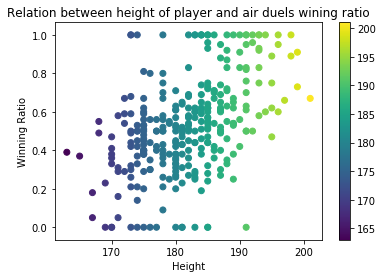

In [155]:
x=scatter_plot.height
y=scatter_plot.Ratio
color=scatter_plot.height
plt.scatter(x, y, c=color)
plt.colorbar()
plt.title("Relation between height of player and air duels wining ratio")
plt.ylabel("Winning Ratio")
plt.xlabel("Height")

the final plot shows the relation between the height of the player and the accuracy of their passes ,which show that the higher is the height the more accurate the pass is, in addition to that , the mid height has a heigher range of acccurate passes

In [156]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Exercise RQ6:

## Go further with the EDA (Exploratory Data Analysis) showing a new interesting result about the dataset that you found.

#### My idea (expected goals): the teams that do more shots have a higher probabilty to win. After doing that I am going further and check if teams with a higher accuracy (ratio between goals and shots) have a higher likelyhood to win the match.

In [157]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import statistics
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math

## Work on DF Events

In [158]:
# Import the DF events, where I can find the required info:

In [159]:
with open('./Dataset/Events/events_England.json') as f:
    events_en = pd.io.json.loads(f.read())

events_en_df = pd.DataFrame(events_en) 
events_en_df = events_en_df[events_en_df.eventName.isin(["Shot"])] # Let's filter for only Shot event
events_en_df.head(n=5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
46,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
62,10,Shot,179.854785,177959247,2499719,1H,26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",1631
91,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
128,10,Shot,425.824035,177959289,2499719,1H,7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",1609
249,10,Shot,815.462015,177959429,2499719,1H,7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",1609


In [160]:
# Let's create a DF with only the teamId, the event, matchId, teamId (I need it to link later each player to his own team):

In [161]:
events_df = events_en_df.drop(columns = ["eventId", "eventSec", "id", "matchPeriod", "playerId", "positions", "subEventId", "subEventName", "tags"])

In [162]:
events_df = events_df[["eventName", "teamId", "matchId"]]

In [163]:
events_df.head()

,eventName,teamId,matchId
46,Shot,1609,2499719
62,Shot,1631,2499719
91,Shot,1631,2499719
128,Shot,1609,2499719
249,Shot,1609,2499719


## Work on team DF:

In [164]:
# Let's get the name and the id of the teams:

with open('./Dataset/teams.json') as f:
    teams = pd.io.json.loads(f.read())
    
teams_df = pd.DataFrame(teams) 
teams_df.head(n = 5)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


In [165]:
# Let's work on the column area:

area = []
for el in teams_df.area:
    area.append(el)

area_df = pd.DataFrame(area) # Let's create a DF for the column area
area_df.columns = ["alpha2code", "alpha3code", "area_id", "area_name"]

In [166]:
# Let's add the new info to our main team DF

teams_df = pd.concat([area_df, teams_df], axis = 1) 
teams_df.head()

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
0,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


In [167]:
teams_df[teams_df['name'].isin(['Swansea City'])]

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
19,,XWA,0,Wales,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531


In [168]:
# Let's keep only the English teams and delete the national ones:

teams_df_1 = teams_df[teams_df["area_name"].isin(["England", "Wales"])] # Include also "Wales" because the Swansea play in the Legue I am interested in and thei area is Wales
teams_df = teams_df_1[teams_df_1.type != 'national']

In [169]:
teams_df.head()

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
0,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
19,,XWA,0,Wales,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531
26,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651


In [170]:
# Let's keep only the columns I need:

teams_df = teams_df.drop(columns = ["alpha2code", "alpha3code", "area_id", "area", "area_name", "city", "officialName", "type"])

In [171]:
teams_df

,name,wyId
0,Newcastle United,1613
8,Huddersfield Town,1673
19,Swansea City,10531
26,AFC Bournemouth,1659
27,Brighton & Hove Albion,1651
39,Burnley,1646
54,Leicester City,1631
55,West Ham United,1633
56,Stoke City,1639
60,Watford,1644


## Work on Match DF

In [172]:
# Let's get the winner of the match from the match DF:

In [173]:
# Import file
with open('./Dataset/matches/matches_England.json') as f:
      matches_en = pd.io.json.loads(f.read())

matches_en_df = pd.DataFrame(matches_en) # Let's create the DF for match json file
matches_en_df.head(n = 5)

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [174]:
# Let's get the columns we need:

match_winner = matches_en_df.drop(columns = ["competitionId", "date", "dateutc", "duration", "gameweek", "referees","roundId","seasonId","status","teamsData", "venue",])
match_winner.columns = ["matchTeams", "winner", "matchId"]
match_winner.head() # From this df i need only matchId and the winnerId

,matchTeams,winner,matchId
0,"Burnley - AFC Bournemouth, 1 - 2",1659,2500089
1,"Crystal Palace - West Bromwich Albion, 2 - 0",1628,2500090
2,"Huddersfield Town - Arsenal, 0 - 1",1609,2500091
3,"Liverpool - Brighton & Hove Albion, 4 - 0",1612,2500092
4,"Manchester United - Watford, 1 - 0",1611,2500093


In [175]:
# Let's split the column matchTeam in two (one for each team):

teams_split = match_winner.matchTeams.str.split("-", expand = True) # Expand put the separted items in two different columns

In [176]:
teams_split.columns=['Team1','Team2','score2']

In [177]:
teams_split.head()

,Team1,Team2,score2
0,Burnley,"AFC Bournemouth, 1",2
1,Crystal Palace,"West Bromwich Albion, 2",0
2,Huddersfield Town,"Arsenal, 0",1
3,Liverpool,"Brighton & Hove Albion, 4",0
4,Manchester United,"Watford, 1",0


In [178]:
teams_split_2 = teams_split.Team2.str.split(",", expand = True) # Let's do for the remaining col

In [179]:
teams_split_2.columns=['Team2', 'score1'] # Let's create the team2 columns and the score1 one

In [180]:
teams_split_2.head()

,Team2,score1
0,AFC Bournemouth,1
1,West Bromwich Albion,2
2,Arsenal,0
3,Brighton & Hove Albion,4
4,Watford,1


In [181]:
teams_split.drop("Team2", axis = 1, inplace = True) # Let's delete Team2 in the first DF created it is not the column we need (it has also the score), the correct one is in teams_split_2

In [182]:
teams_splt = pd.concat([teams_split, teams_split_2], axis = 1) # Let's create the complete DF about team name and score

In [183]:
teams_splt = teams_splt[["Team1", "Team2", "score1", "score2"]]

In [184]:
teams_splt.Team1 = teams_splt.Team1.str.strip() # Let's delete any space nefore or after the words
teams_splt.Team2 = teams_splt.Team2.str.strip()

In [185]:
teams_splt.head()

,Team1,Team2,score1,score2
0,Burnley,AFC Bournemouth,1,2
1,Crystal Palace,West Bromwich Albion,2,0
2,Huddersfield Town,Arsenal,0,1
3,Liverpool,Brighton & Hove Albion,4,0
4,Manchester United,Watford,1,0


In [186]:
# Let's append teams_splt to original DF match_winner:

In [187]:
matches_df = pd.concat([teams_splt, match_winner], axis = 1)

In [188]:
matches_df.drop("matchTeams", axis = 1, inplace = True) # Delete the column that I have splited (matchTeams)

In [189]:
matches_df.insert(1, "idTeam1", np.nan) # Add the column for the id of the first team

In [190]:
matches_df.insert(3, "idTeam2", np.nan) # Same for the second team

In [191]:
matches_df.insert(7, "loser", np.nan) # Add the column for losers id

In [192]:
matches_df.head()

,Team1,idTeam1,Team2,idTeam2,score1,score2,winner,loser,matchId
0,Burnley,NaN,AFC Bournemouth,NaN,1,2,1659,NaN,2500089
1,Crystal Palace,NaN,West Bromwich Albion,NaN,2,0,1628,NaN,2500090
2,Huddersfield Town,NaN,Arsenal,NaN,0,1,1609,NaN,2500091
3,Liverpool,NaN,Brighton & Hove Albion,NaN,4,0,1612,NaN,2500092
4,Manchester United,NaN,Watford,NaN,1,0,1611,NaN,2500093


## Work on DF teams and matches:

In [193]:
# Let's find the idea of each team in the matches df:

In [194]:
for i in range(matches_df.shape[0]): # For Team 1
    for j in range(teams_df.name.shape[0]):
        if matches_df.iloc[i, 0] == teams_df.iloc[j, 0].strip(): # If the team name in matches is the same of the one teams df
            matches_df.iloc[i, 1] = teams_df.iloc[j, 1] # Add the Id of the team in matches DF

In [195]:
matches_df.head()

,Team1,idTeam1,Team2,idTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646.0,AFC Bournemouth,NaN,1,2,1659,NaN,2500089
1,Crystal Palace,1628.0,West Bromwich Albion,NaN,2,0,1628,NaN,2500090
2,Huddersfield Town,1673.0,Arsenal,NaN,0,1,1609,NaN,2500091
3,Liverpool,1612.0,Brighton & Hove Albion,NaN,4,0,1612,NaN,2500092
4,Manchester United,1611.0,Watford,NaN,1,0,1611,NaN,2500093


In [196]:
for i in range(matches_df.shape[0]): # For Team 2
    for j in range(teams_df.name.shape[0]):
        if matches_df.iloc[i, 2] == teams_df.iloc[j, 0].strip(): # If the team name in matches is the same of the one teams df
            matches_df.iloc[i, 3] = teams_df.iloc[j, 1] # Add the Id of the team in matches DF

In [197]:
matches_df.head()

,Team1,idTeam1,Team2,idTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646.0,AFC Bournemouth,1659.0,1,2,1659,NaN,2500089
1,Crystal Palace,1628.0,West Bromwich Albion,1627.0,2,0,1628,NaN,2500090
2,Huddersfield Town,1673.0,Arsenal,1609.0,0,1,1609,NaN,2500091
3,Liverpool,1612.0,Brighton & Hove Albion,1651.0,4,0,1612,NaN,2500092
4,Manchester United,1611.0,Watford,1644.0,1,0,1611,NaN,2500093


In [198]:
# Let's get the Id of the loser:

In [199]:
for i in range(matches_df.shape[0]):
    
    if matches_df.iloc[i, 6] == matches_df.iloc[i, 1]: # If the winner id is equal to team1 id
        matches_df.iloc[i, 7] = matches_df.iloc[i, 3] # loser is the id team 2
    else:
        matches_df.iloc[i, 7] = matches_df.iloc[i, 1] # else loser is the id team 1

In [200]:
matches_df.head()

,Team1,idTeam1,Team2,idTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646.0,AFC Bournemouth,1659.0,1,2,1659,1646.0,2500089
1,Crystal Palace,1628.0,West Bromwich Albion,1627.0,2,0,1628,1627.0,2500090
2,Huddersfield Town,1673.0,Arsenal,1609.0,0,1,1609,1673.0,2500091
3,Liverpool,1612.0,Brighton & Hove Albion,1651.0,4,0,1612,1651.0,2500092
4,Manchester United,1611.0,Watford,1644.0,1,0,1611,1644.0,2500093


In [201]:
# Let's change the format of idTeam1/2 and loser in int:

In [202]:
matches_df.idTeam1 = matches_df.idTeam1.astype('int64')
matches_df.idTeam2 = matches_df.idTeam2.astype('int64')
matches_df.loser = matches_df.loser.astype('int64')

In [203]:
matches_df.head()

,Team1,idTeam1,Team2,idTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646,AFC Bournemouth,1659,1,2,1659,1646,2500089
1,Crystal Palace,1628,West Bromwich Albion,1627,2,0,1628,1627,2500090
2,Huddersfield Town,1673,Arsenal,1609,0,1,1609,1673,2500091
3,Liverpool,1612,Brighton & Hove Albion,1651,4,0,1612,1651,2500092
4,Manchester United,1611,Watford,1644,1,0,1611,1644,2500093


In [204]:
matches_df.insert(2, "shotsTeam1", np.nan) # Add the column for the shots of team 1

In [205]:
matches_df.insert(5, "shotsTeam2", np.nan) # Add the column for the id of the first team

In [206]:
matches_df.head()

,Team1,idTeam1,shotsTeam1,Team2,idTeam2,shotsTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646,NaN,AFC Bournemouth,1659,NaN,1,2,1659,1646,2500089
1,Crystal Palace,1628,NaN,West Bromwich Albion,1627,NaN,2,0,1628,1627,2500090
2,Huddersfield Town,1673,NaN,Arsenal,1609,NaN,0,1,1609,1673,2500091
3,Liverpool,1612,NaN,Brighton & Hove Albion,1651,NaN,4,0,1612,1651,2500092
4,Manchester United,1611,NaN,Watford,1644,NaN,1,0,1611,1644,2500093


In [207]:
# Let's count how many shot each team did in each match:

In [208]:
for i in range(matches_df.shape[0]):
    
    counter_t1 = 0
    counter_t2 = 0

    for j in range(events_df.shape[0]):
        if matches_df.iloc[i, 10] == events_df.iloc[j, 2]: # If it is the same event
            if matches_df.iloc[i, 1] == events_df.iloc[j, 1]: # and it is equal to team1 id
                counter_t1 += 1 # increase the shot counter for team 1
            elif matches_df.iloc[i, 4] == events_df.iloc[j, 1]: # else it is equal to team2 id
                counter_t2 += 1 # increase the shot counter for team 1
                
    matches_df.iloc[i, 2] = counter_t1
    matches_df.iloc[i, 5] = counter_t2

In [209]:
matches_df.head()

,Team1,idTeam1,shotsTeam1,Team2,idTeam2,shotsTeam2,score1,score2,winner,loser,matchId
0,Burnley,1646,9.0,AFC Bournemouth,1659,14.0,1,2,1659,1646,2500089
1,Crystal Palace,1628,11.0,West Bromwich Albion,1627,5.0,2,0,1628,1627,2500090
2,Huddersfield Town,1673,18.0,Arsenal,1609,8.0,0,1,1609,1673,2500091
3,Liverpool,1612,21.0,Brighton & Hove Albion,1651,2.0,4,0,1612,1651,2500092
4,Manchester United,1611,7.0,Watford,1644,5.0,1,0,1611,1644,2500093


In [210]:
# Let's create a column in which it says who did more passages:

In [211]:
matches_df.insert(8, "moreShots", np.nan) # Add the column for the team that did more shots

In [212]:
matches_df.head()

,Team1,idTeam1,shotsTeam1,Team2,idTeam2,shotsTeam2,score1,score2,moreShots,winner,loser,matchId
0,Burnley,1646,9.0,AFC Bournemouth,1659,14.0,1,2,NaN,1659,1646,2500089
1,Crystal Palace,1628,11.0,West Bromwich Albion,1627,5.0,2,0,NaN,1628,1627,2500090
2,Huddersfield Town,1673,18.0,Arsenal,1609,8.0,0,1,NaN,1609,1673,2500091
3,Liverpool,1612,21.0,Brighton & Hove Albion,1651,2.0,4,0,NaN,1612,1651,2500092
4,Manchester United,1611,7.0,Watford,1644,5.0,1,0,NaN,1611,1644,2500093


In [213]:
for i in range(matches_df.shape[0]):
    if matches_df.shotsTeam1[i] > matches_df.shotsTeam2[i]:
        matches_df.moreShots[i] = matches_df.idTeam1[i]
    else:
        matches_df.moreShots[i] = matches_df.idTeam2[i]

/Users/Dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Dario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [214]:
matches_df.moreShots = matches_df.moreShots.astype('int64')

In [215]:
matches_df.head()

,Team1,idTeam1,shotsTeam1,Team2,idTeam2,shotsTeam2,score1,score2,moreShots,winner,loser,matchId
0,Burnley,1646,9.0,AFC Bournemouth,1659,14.0,1,2,1659,1659,1646,2500089
1,Crystal Palace,1628,11.0,West Bromwich Albion,1627,5.0,2,0,1628,1628,1627,2500090
2,Huddersfield Town,1673,18.0,Arsenal,1609,8.0,0,1,1673,1609,1673,2500091
3,Liverpool,1612,21.0,Brighton & Hove Albion,1651,2.0,4,0,1612,1612,1651,2500092
4,Manchester United,1611,7.0,Watford,1644,5.0,1,0,1611,1611,1644,2500093


## Work with data to check if my Hp is true:

In [216]:
winner_ms = 0
winner_ls = 0
for i in range(matches_df.shape[0]):
    if matches_df.iloc[i, 8] == matches_df.iloc[i, 9]: # If who did more shots also won
        winner_ms += 1 # Add one to the counter which counts the winnwer related with more shots
    elif matches_df.iloc[i, 8] == matches_df.iloc[i, 10]:
        winner_ls += 1 # else add 1 to the counter who counts the winner even it hey had done less shots

In [217]:
# Let's see the percentage (without take in account the matches ended with a draw):
# it seems that the number of shots slightly affects te likelyhood to win

perc_wms = winner_ms/(winner_ms + winner_ls)*100
perc_wls = winner_ls/(winner_ms + winner_ls)*100

print("Percentage of teams that did more shots and won: ", "{0:.0f}%".format(perc_wms), "\nPercentage of teams that did less shots and won: ", "{0:.0f}%".format(perc_wls))

Percentage of teams that did more shots and won:  58% 
Percentage of teams that did less shots and won:  42%


In [218]:
# Anyway I haven't taken in account the draw event, let's see if when two teams draw that have done almost the same amount of shots:
# The idea is to check if the mean of the absolute value of the difference between the shots done by the two teams is lower than the one when I take in account matches that dosen't end with a draw
# My idea is that if my Hp is true, the the teams drwa because they have doen almsot the same amount of shot => the mean of diff should be close to 0

draw_df = matches_df[matches_df["winner"].isin(["0"])] # Let's create a DF with only draw event
shots_diff = []
for i in range(draw_df.shape[0]): # Let's calculate the difference between shots done by the two teams
    shots_diff.append(abs(draw_df.iloc[i, 2] - draw_df.iloc[i, 5]))
    
mean_shot_diff = statistics.mean(shots_diff) # Let's calculate the mean
dev_shot_diff = statistics.stdev(shots_diff) # and the standard deviation

print("mean: ", "{:.2f}" .format(mean_shot_diff), "\nSD: ", "{:.4f}".format(dev_shot_diff))

mean:  7.30 
SD:  6.3632


In [219]:
# Let's do the same for the matches with a winner:

shots_diff_all = []
for i in range(matches_df.shape[0]): # Let's calculate the difference between shots done by the two teams
    if matches_df.iloc[i, 9] != 0:
        shots_diff_all.append(abs(matches_df.iloc[i, 2] - matches_df.iloc[i, 5]))

mean_shot_diff_all = statistics.mean(shots_diff_all) # Let's calculate the mean
dev_shot_diff_all = statistics.stdev(shots_diff_all) # and the standard deviation

print("mean: ", "{:.2f}" .format(mean_shot_diff_all), "\nSD: ", "{:.4f}".format(dev_shot_diff_all))

mean:  7.09 
SD:  5.1295


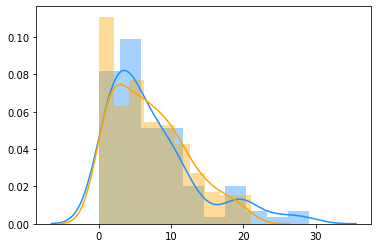

In [220]:
# Let's see how the diff of the two DF is distributed:
# The diff is less in the matches with a winner than in the others, so another point against my thesis.

sns.distplot(shots_diff, color = "dodgerblue", label = "Draw_Matches")
sns.distplot(shots_diff_all, color = "orange", label = "Not_Draw_Matches")

# Firststep conclusions:

As I can see the number of shots done in a match by each team don't give any additional information about who will win the match.

Only in the 58% of the cases who has done more shots wins the match. Furthermore, when I take in account matches that end with a draw it seems that they don't have any reason related to the number of shots to finish in this way: the mean of the difference between the number of shots done by the two teams is almost the same of the matches that don't end with a draw.

## Let's see anyway if the teams that have a higher ratio between goal/shots, win more matches then the other teams (I am not going toconsider draw):

In [221]:
# let's  create a DF with total goal and total shots:

In [222]:
# Let's create a dicitionary with the id of all teams

team_goal_dict = collections.defaultdict(list) # I use this kind of dictionary so I can easily appen directly element in the list for each key
teams = events_df.teamId.unique()
for el in teams:
    team_goal_dict.update({el: []})

In [223]:
# Let's add as value a lis of all goals scored by each team during the season:

for team in teams: # for each team id
    for j in range(matches_df.shape[0]):
        if matches_df.iloc[j, 1] == team: # If python finds it in column one
            team_goal_dict[team].append(matches_df.iloc[j, 6]) # add the score 1 result to the list related to that id
        if matches_df.iloc[j, 4] == team:
            team_goal_dict[team].append(matches_df.iloc[j, 7])     

In [224]:
# Let's get the sum of goals in the season for each team:

tot_goal_d = []
for key, value in team_goal_dict.items():
    for n in range(len(value)): 
        value[n] = int(value[n]) # Convert the value in the list in a string
    tot_goal_d.append({"team": key, "goal:": sum(value)}) # Create a list of dictionaries (each key )

goals_df = pd.DataFrame(tot_goal_d)

In [225]:
# Let's create a dicitionary with the id of all teams

team_shot_dict = collections.defaultdict(list) # I use this kind of dictionary so I can easily appen directly element in the list for each key
teams = events_df.teamId.unique()
for el in teams:
    team_shot_dict.update({el: []})

In [226]:
# Let's do the same thing done for goals her for shots:

for team in teams: # for each team id
    for j in range(matches_df.shape[0]):
        if matches_df.iloc[j, 1] == team: # If python finds it in column one
            team_shot_dict[team].append(matches_df.iloc[j, 2]) # add the shot 1 result to the list related to that id
        if matches_df.iloc[j, 4] == team:
            team_shot_dict[team].append(matches_df.iloc[j, 5]) 

In [227]:
# Let's get the sum of shots in the season for each team:

tot_shot_d = []
for key, value in team_shot_dict.items():
    for n in range(len(value)):
        value[n] = int(value[n])
    tot_shot_d.append({"team": key, "shots:": sum(value)})

shots_df = pd.DataFrame(tot_shot_d)

In [228]:
# Let's create the dataset with shots and goals by merging:

shot_goal_df = pd.merge(shots_df, right = goals_df, on = "team")
shot_goal_df.columns = ["shot", "team", "goal"]

In [229]:
shot_goal_df.head()

,shot,team,goal
0,538,1609,74
1,375,1631,56
2,603,1625,106
3,355,1651,34
4,344,1646,36


In [230]:
# Let's calculate the ratio:

ratio_d = []
for i in range(shot_goal_df.shape[0]):
    ratio_d.append({"team": int(shot_goal_df.iloc[i, 1]), "ratio": round(shot_goal_df.iloc[i, 2]/shot_goal_df.iloc[i, 0], 2)})

ratio_df = pd.DataFrame(ratio_d)
ratio_df.columns = ["ratio", "team"] # TO do this I have taken a look of how python have built my DF

In [231]:
ratio_df.head()

,ratio,team
0,0.14,1609
1,0.15,1631
2,0.18,1625
3,0.10,1651
4,0.10,1646


In [232]:
sgr_df = pd.merge(shot_goal_df, right = ratio_df, on = "team")

In [233]:
sgr_df.head()

,shot,team,goal,ratio
0,538,1609,74,0.14
1,375,1631,56,0.15
2,603,1625,106,0.18
3,355,1651,34,0.10
4,344,1646,36,0.10


In [234]:
# Let's add to the DF als a columns with the tot wins:

In [235]:
# Let's create a dicitionary with the id of all teams

team_win_dict = collections.defaultdict(list) # I use this kind of dictionary so I can easily appen directly element in the list for each key
teams = events_df.teamId.unique()
for el in teams:
    team_win_dict.update({el: []})

In [236]:
# Let's find the match won in the match_df for each team and add to the dictionary:

for team in teams: # for each team id
    for j in range(matches_df.shape[0]):
        if matches_df.iloc[j, -3] == team: # If python finds it in column winner
            team_win_dict[team].append(matches_df.iloc[j, -3]) # add it to the dictionary

In [237]:
# Let's get the sum of shots in the season for each team:

tot_win_d = []
for key, value in team_win_dict.items():
    tot_win_d.append({"Team": key, "wins:": len(value)})

wins_df = pd.DataFrame(tot_win_d)
wins_df.columns = ["team", "wins"]

In [238]:
# Let's merge the result with the str_df:

sgrw_df = pd.merge(sgr_df, right = wins_df, on = "team")
sgrw_df.sort_values("ratio", inplace = True, ascending = False)

In [239]:
sgr_df.head()

,shot,team,goal,ratio
0,538,1609,74,0.14
1,375,1631,56,0.15
2,603,1625,106,0.18
3,355,1651,34,0.10
4,344,1646,36,0.10


## Let's see if there is correlation:

In [240]:
# Pearson correlation:
# It is very high! Our Hp is true

corr, _ = pearsonr(sgrw_df["ratio"], sgrw_df["wins"])
print(round(corr, 4))

0.7339


In [241]:
sgrw_df["wins"].head()

2     32
10    25
11    10
1     12
8     12
Name: wins, dtype: int64

In [242]:
# Let's create a linear model:
# The p-value of the test on the coeff is alost 0 so I can say that the coefficent I get is not given just from the noise
# The R-Squared is also pretty high, so the model well fits data

regressor = sm.OLS(sgrw_df["wins"], sgrw_df["ratio"]).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   wins   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              156.7
Date:                Wed, 30 Oct 2019   Prob (F-statistic):                    1.26e-10
Time:                        21:44:04   Log-Likelihood:                         -61.047
No. Observations:                  20   AIC:                                      124.1
Df Residuals:                      19   BIC:                                      125.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ratio        120.8165      9.651     12.518      0.000     100.616     141.017
==============================================================================
Omnibus:                        2.227   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.832
Skew:                           0.637   Prob(JB):                        0.400
Kurtosis:                       2.243   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

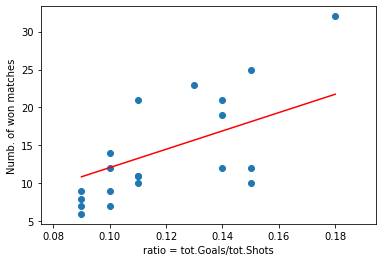

In [243]:
# Grafically it seems there is a linear dependance between ration and number of matches won:
# Maybe a log or exp fit can work better, anyway the sample is too small the be sure about it

plt.scatter(sgrw_df["ratio"], sgrw_df["wins"])
plt.plot(sgrw_df["ratio"], regressor.predict(sgrw_df["ratio"]), color = 'red')
plt.xlabel("ratio = tot.Goals/tot.Shots")
plt.ylabel("Numb. of won matches")
plt.show()

# Final Consideration:

It is important to underlin that the sample on which I have done my statistics is too small to state that what I have found is 100% true, as matter of fact I haven't had enough observations to split my dataset.

Anyway, notwithstanding there isn't a correlation between the number of shots and the won matches, it is clear from the data that there is one between the accuracy of the shots (ratio between goals and shots) and the likelyhood to win a match. The data over a seson shows that the higher is the accuracy ratio and the more the teams win.

# Exercise CRQ1:

#### What are the time slots of the match with more goals? Let's analyse and visualise the goals distribution into 9-minutes sets for all the matches. I.e., let's transform the minute of a goal from a continuous variable in a discrete variable (e.g. A goal scored in 5th minute, will end up in the interval [0-9)). Remind that every match goes usually from minute 0, to minute 90, but in football it is always added an arbitary amount of extra-time to every half of the match, thus consider also the intervals "45+" and "90+".

#### Make a barplot with the absolute frequency of goals in all the time slots.
#### Find the top 10 teams that score the most in the interval "81-90".
#### Show if there are players that were able to score at least one goal in 8 different intervals.

In [244]:
import json 
import pandas as pd
import numpy as np
import collections 
import datetime
import matplotlib.pyplot as plt
import operator

## Let's get the team names:

In [245]:
# import Data:

In [246]:
with open('./Dataset/teams.json') as f:
    teams = pd.io.json.loads(f.read())
    
teams_df = pd.DataFrame(teams) 
teams_df.head(n = 5)

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


In [247]:
# Let's get info from column area and add to the main DF:

In [248]:
area = [] # It will contain all dictionaries in clumn area
for el in teams_df.area:
    area.append(el)

area_df = pd.DataFrame(area) # Let's create a DF for the column area
area_df.columns = ["alpha2code", "alpha3code", "area_id", "area_name"]

In [249]:
teams_df = pd.concat([area_df, teams_df], axis = 1) # Let's add the new info to our main team DF

In [250]:
teams_df.head()

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
0,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
2,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
3,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
4,ES,ESP,724,Spain,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695


In [251]:
# Let's filter by area_name = England:

In [252]:
teams_df[teams_df['name'].isin(['Swansea City'])] # Also this team play in Premier Legue it is from a different region

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
19,,XWA,0,Wales,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531


In [253]:
teams_df_1 = teams_df[teams_df["area_name"].isin(["England", "Wales"])] # Include also "Wales" because the Swansea play in the Legue I am interested in and thei area is Wales
teams_df = teams_df_1[teams_df_1.type != 'national'] # Let's remove national team

In [254]:
teams_df.head()

,alpha2code,alpha3code,area_id,area_name,area,city,name,officialName,type,wyId
0,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
8,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
19,,XWA,0,Wales,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531
26,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
27,,XEN,0,England,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651


In [255]:
# Let's keep only the column name and wyId

In [256]:
teams_df = teams_df.drop(columns = ["alpha2code", "alpha3code", "area_id", "area", "area_name", "city", "officialName", "type"])

In [257]:
teams_df.columns = ["teamName", "teamId"] # I ranem in such a way that later I can merge easily

In [258]:
teams_df

,teamName,teamId
0,Newcastle United,1613
8,Huddersfield Town,1673
19,Swansea City,10531
26,AFC Bournemouth,1659
27,Brighton & Hove Albion,1651
39,Burnley,1646
54,Leicester City,1631
55,West Ham United,1633
56,Stoke City,1639
60,Watford,1644


## Get the players' names:

In [259]:
# Import data:

In [260]:
with open('./Dataset/players.json') as f:
    players = pd.io.json.loads(f.read())

players_df = pd.DataFrame(players) 
players_df.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


In [261]:
# Let's keep only players that play in a Premier Legue team:

In [262]:
for i in range(len(players_df.currentTeamId)): # Replace missing values with 0
    if players_df.iloc[i, 3] == None:
        players_df.iloc[i, 3] = 0
for i in range(len(players_df.currentTeamId)): # Replace "null" values with 0
    if players_df.iloc[i, 3] == "null":
        players_df.iloc[i, 3] = 0
players_df.currentTeamId = players_df.currentTeamId.astype("int32") # change the data type of the column

In [263]:
teams_en = list(map(lambda x: str(x), teams_df.teamId.unique())) # Get a list of string of the Premier Legue's Teams 
players_en_df = players_df[players_df.currentTeamId.isin(teams_en)] # Create a new DF with only the players of the Premier Legue


In [264]:
players_en_df.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
9,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",1992-02-14,7712,1624,Christian,right,180,Dannemann Eriksen,,"{'name': 'Denmark', 'id': '208', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",C. Eriksen,76,54
15,"{'name': 'Iceland', 'id': '352', 'alpha3code':...",1990-10-27,7839,1646,Johann,left,186,Berg Gu\u00f0munds\u00adson,,"{'name': 'Iceland', 'id': '352', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",J. Gu\u00f0munds\u00adson,77,93
35,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-08-02,5629,1627,Nacer,right,187,Chadli,,"{'name': 'Morocco', 'id': '504', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",N. Chadli,80,261


In [265]:
# Let's keep only the columns I need:

In [266]:
players_en_df.drop(columns = ["birthArea", "birthDate", "currentNationalTeamId", "currentTeamId", "firstName",
                             "foot", "height", "lastName", "middleName", "passportArea", "role", "weight"], inplace = True)

/Users/Dario/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [267]:
players_en_df.head()

,shortName,wyId
6,T. Alderweireld,36
7,J. Vertonghen,48
9,C. Eriksen,54
15,J. Gu\u00f0munds\u00adson,93
35,N. Chadli,261


In [268]:
# Rename columns in a useful way for the merge:

In [269]:
players_en_df.columns = ["playerName", "playerId"]

In [270]:
players_en_df.head()

,playerName,playerId
6,T. Alderweireld,36
7,J. Vertonghen,48
9,C. Eriksen,54
15,J. Gu\u00f0munds\u00adson,93
35,N. Chadli,261


## Let's get the information I need from the DF Events:

In [271]:
# Import file and clean the DF:

In [272]:
with open('./Dataset/Events/events_England.json') as f:
    events_en = pd.io.json.loads(f.read())

events_en_df = pd.DataFrame(events_en) 

In [273]:
events_en_df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609


In [274]:
# Let's filter for the tags goal (101) and tags scored (1801):

In [275]:
goal = [] # it will be a list of dictionaries
for i in range(events_en_df.shape[0]):
    el = events_en_df.iloc[i, 10] # It is the element in the cell under the column "tags" and the i row (it's a list)
    for j in range(len(el)):
        if el[j]["id"] == 101: # If the the element of the list in position j (it is a dictionary) has as value 101
            d = events_en_df.iloc[i].to_dict() # transform that row of the DF in a dictionary
            goal.append(d) # and append to the list

all_goal_en_df = pd.DataFrame(goal) # Let's create the DF for our list (it is the DF with only tag 101)

In [276]:
final = []
for i in range(all_goal_en_df.shape[0]):
    el = all_goal_en_df.iloc[i, 10]
    for j in range(len(el)):
        if el[j]["id"] == 1801:
            d = all_goal_en_df.iloc[i].to_dict()
            final.append(d)

goal_en_df = pd.DataFrame(final)  

In [277]:
# Let's check if there is any goal blocked (tag "2101"):

In [278]:
counter = 0
for i in range(goal_en_df.shape[0]):
    el = goal_en_df.iloc[i, 10] # element under the column tag and row i
    for j in range(len(el)):
        if el[j]["id"] == 2101: # if the dictionary in the list in position j has as value 2101
            counter += 1 # Increase the counter of the blocks

In [279]:
counter # counter = 0, it means that I have worked wellin the previous steps

0

In [280]:
goal_en_df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
1,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
2,10,Shot,1710.855093,177959759,2499719,1H,12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1631
3,10,Shot,2815.900791,177960130,2499719,1H,7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
4,10,Shot,634.312236,177960379,2499719,2H,12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",100,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631


In [281]:
# Let's clean the DF:

In [282]:
goal_en_df.drop(columns = ["eventName", "id", "matchId", "positions", "subEventName"], inplace = True)

In [283]:
goal_en_df.columns = ["eventId", "eventSec", "matchPeriod", "playerId", "subEventId", "tags", "teamId"]

In [284]:
goal_en_df.head()

,eventId,eventSec,matchPeriod,playerId,subEventId,tags,teamId
0,10,94.595788,1H,25413,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
1,10,254.745027,1H,14763,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631
2,10,1710.855093,1H,12829,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1631
3,10,2815.900791,1H,7945,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609
4,10,634.312236,2H,12829,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631


In [285]:
# Let's transform seconds in minutes:

In [286]:
eventSec = [] # List of all elements of the column eventSec (to convert in minutes)
for time in goal_en_df.eventSec:
    eventSec.append(time)

period = [] # All periods in column matchPeriod
for p in goal_en_df.matchPeriod:
    period.append(p)
    
to_minutes = [] # List of dictionaries to create the column of the DF
for i in range(len(eventSec)):
    to_minutes.append({"eventMin": int(eventSec[i]//60), # I need only the minutes so I divide for 60 and won't get the rest
                      "Period": period[i]}) # Add also the period to understand in which I am

In [287]:
# Let's add 45 minutes to all times in the second alpha of the match:

In [288]:
for el in to_minutes:
    if el["Period"] == "2H":
        el["eventMin"] = el["eventMin"] + 45 # Add 45 minutes to each time in the second half

In [289]:
# Let's create the DF with the dict to:mnutes and merge with the main DF:

In [290]:
minutes_en_df = pd.DataFrame(to_minutes)
goal_min_en_df = pd.concat([goal_en_df, minutes_en_df.eventMin], axis = 1) # concatenate the main DF with only the column I need of the pther DF

In [291]:
goal_min_en_df.head()

,eventId,eventSec,matchPeriod,playerId,subEventId,tags,teamId,eventMin
0,10,94.595788,1H,25413,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609,1
1,10,254.745027,1H,14763,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631,4
2,10,1710.855093,1H,12829,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1631,28
3,10,2815.900791,1H,7945,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",1609,46
4,10,634.312236,2H,12829,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",1631,55


In [292]:
goal_min_en_df.drop("eventSec", axis = 1 , inplace = True) # Let's delete the columneventSec I don't need it anymore

In [293]:
goal_min_en_df = goal_min_en_df[["eventId", "eventMin", "matchPeriod",	"subEventId", "tags", "playerId", "teamId"]] # Let's reorder the columns (I want in the second position eventMin)

In [294]:
goal_min_en_df.head()

,eventId,eventMin,matchPeriod,subEventId,tags,playerId,teamId
0,10,1,1H,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,1609
1,10,4,1H,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,1631
2,10,28,1H,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,1631
3,10,46,1H,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,1609
4,10,55,2H,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,1631


## Let's group the goals in interval [0, 9) till the end of the match, special intervals are needed for the extratime:

In [295]:
# let's add a new column to the DF called interval, which says in which interval the goal is done:

In [296]:
goal_min_en_df.insert(3, "interval", "")

In [297]:
goal_min_en_df.head()

,eventId,eventMin,matchPeriod,interval,subEventId,tags,playerId,teamId
0,10,1,1H,,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,1609
1,10,4,1H,,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,1631
2,10,28,1H,,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,1631
3,10,46,1H,,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,1609
4,10,55,2H,,100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,1631


In [298]:
# Let's assign each goal to the right interval:

In [299]:
for i in range(len(goal_min_en_df)):
    minut = goal_min_en_df.iloc[i, 1] # it corresponds to the cell under column eventMin and row i
    period = goal_min_en_df.iloc[i, 2] # it corresponds to the cell under column matchPeriod and row i
    if minut < 9: # If the minute in which the goal is scored is less then 9
        goal_min_en_df.iat[i, 3] = "[0, 9)" # write on the column interval the interval "[0, 9)"
    elif minut >= 9 and minut < 18: # if the minute in which the goal is scored is 9<= minut < 18 
        goal_min_en_df.iat[i, 3] = "[9, 18)" # write on the column interval the interval "[9, 18)"
    elif minut >= 18 and minut < 27: # and so on....
        goal_min_en_df.iat[i, 3] = "[18, 27)"
    elif minut >= 27 and minut < 36:
        goal_min_en_df.iat[i, 3] = "[27, 36)"
    elif minut >= 36 and minut < 45:
        goal_min_en_df.iat[i, 3] = "[36, 45)"
    elif minut >= 45 and period == "1H": # If the minute is more than 45 but it is in half 1 it means that the gol is made during the extra time
        goal_min_en_df.iat[i, 3] = "45+"
    elif minut >= 45 and minut < 54:
        goal_min_en_df.iat[i, 3] = "[45,54)" # Then it starts again from 45 without counting the extra time
    elif minut >= 54 and minut < 63:
        goal_min_en_df.iat[i, 3] = "[54, 63)"
    elif minut >= 63 and minut < 72:
        goal_min_en_df.iat[i, 3] = "[63, 72)"
    elif minut >= 72 and minut < 81:
        goal_min_en_df.iat[i, 3] = "[72, 81)"
    elif minut >= 81 and minut < 90:
        goal_min_en_df.iat[i, 3] = "[81, 90)"
    elif minut >= 90 and period == "2H":  
        goal_min_en_df.iat[i, 3] = "90+"

In [300]:
goal_min_en_df.head()

,eventId,eventMin,matchPeriod,interval,subEventId,tags,playerId,teamId
0,10,1,1H,"[0, 9)",100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,1609
1,10,4,1H,"[0, 9)",100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,1631
2,10,28,1H,"[27, 36)",100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",12829,1631
3,10,46,1H,45+,100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7945,1609
4,10,55,2H,"[54, 63)",100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",12829,1631


## Task 1: Bar plot of absolute frequency for each interval:

In [301]:
# Let's print in a sorted way (from highest frequency to the lowest) the goals per interval:

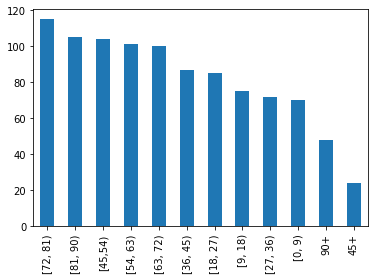

In [302]:
goal_min_en_df.interval.value_counts().plot(kind = "bar") # value_counts() count ow many times an element occurs

It is easy to see that scored goals have a higher frequency during the second half of the match, namely it is more probable that a team do a goal during the second half of the match. As I can imagine the goal frequency scored during the extra time is lower than the one during the regular time. Furthermore, it seems that teams scored more goal during the extra time after the second half. I think it is due to the fact that a team gives everything at the end in order to try to win or at least draw the match, so it puts more effort at the end of the second half than at the end of the first one.

## Task 2: Find the top 10 teams that score the most in the interval "81-90":

In [303]:
# Let's create a Df with only records with the interval of interest:

In [304]:
interval_81_90 = goal_min_en_df[goal_min_en_df.interval.isin(["[81, 90)"])]
interval_81_90.is_copy = None # Say to Python this DF is not a copy to another one

/Users/Dario/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/Dario/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [305]:
interval_81_90.head()

,eventId,eventMin,matchPeriod,interval,subEventId,tags,playerId,teamId
5,10,82,2H,"[81, 90)",100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7870,1609
6,10,84,2H,"[81, 90)",100,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",26010,1609
12,10,87,2H,"[81, 90)",100,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",7892,1610
18,10,86,2H,"[81, 90)",100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",134513,1611
19,10,89,2H,"[81, 90)",100,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",7936,1611


In [306]:
# Let's groupby the team:

In [307]:
interval_81_90.drop(columns = ["eventId", "eventMin", "matchPeriod", "subEventId", "tags", "playerId"], inplace = True) # Delet the columns I don't need

In [308]:
rank = interval_81_90.groupby(interval_81_90.teamId).count().to_dict()

In [309]:
# Let's create a dictionary to our outcome:

In [310]:
rank # It is nasted dictionary (but I need only the dict inside)

{'interval': {1609: 11,
  1610: 9,
  1611: 9,
  1612: 7,
  1613: 2,
  1619: 4,
  1623: 3,
  1624: 5,
  1625: 13,
  1627: 3,
  1628: 7,
  1631: 3,
  1633: 6,
  1639: 1,
  1644: 7,
  1646: 4,
  1651: 2,
  1659: 5,
  1673: 1,
  10531: 3}}

In [311]:
sortable_rank = {} # Dictionary with key = teamId and value = Frequency of goal in the interval 81-90
for key, value in rank['interval'].items():
    sortable_rank[key] = value

In [312]:
sorted_rank = sorted(sortable_rank.items(), key = lambda x: x[1], reverse = True) # Let's sort the dictionary, lamba function says that from the list should get the first element, namely the list is key and values of the dict it should get values, which become the key of the functio sorted()

In [313]:
# Let's show the first 10 teams that score the most in the interval "81-90".

In [314]:
sorted_rank[0:11]

[(1625, 13),
 (1609, 11),
 (1610, 9),
 (1611, 9),
 (1612, 7),
 (1628, 7),
 (1644, 7),
 (1633, 6),
 (1624, 5),
 (1659, 5),
 (1619, 4)]

In [315]:
# Let's find the name of these teams:

In [316]:
name_rank = [] # list of tuples with team name and its score
for el in sorted_rank[0:11]: # For each team
    for i in range(teams_df.shape[0]): 
        if el[0] == teams_df.iloc[i, 1]: # if the team name corresponds to the one in the DF
            name_rank.append((teams_df.iloc[i, 0], el[1])) # Create a tuple with the team name and its score
            break # then go to the next team

In [317]:
name_rank

[('Manchester City', 13),
 ('Arsenal', 11),
 ('Chelsea', 9),
 ('Manchester United', 9),
 ('Liverpool', 7),
 ('Crystal Palace', 7),
 ('Watford', 7),
 ('West Ham United', 6),
 ('Tottenham Hotspur', 5),
 ('AFC Bournemouth', 5),
 ('Southampton', 4)]

## Task 3: Show if there are players that were able to score at least one goal in 8 different intervals

In [318]:
# Let's create a dictionary whch has as keys the intervals and as values a list with the player who scored in that interval:

In [319]:
interval_dict = collections.defaultdict(list) # to each interval (the key) is linked a list (as value)
intervals = goal_min_en_df.interval.unique() # Show me each interval only once
for key in intervals:
    interval_dict[key] = []

In [320]:
interval_dict

defaultdict(list,
            {'[0, 9)': [],
             '[27, 36)': [],
             '45+': [],
             '[54, 63)': [],
             '[81, 90)': [],
             '[63, 72)': [],
             '[18, 27)': [],
             '[36, 45)': [],
             '[72, 81)': [],
             '[45,54)': [],
             '90+': [],
             '[9, 18)': []})

In [321]:
for key, _ in interval_dict.items(): # for each interval
    for i in range(len(goal_min_en_df)):
        inter = goal_min_en_df.iloc[i, 3] # Df interval
        player = goal_min_en_df.iloc[i, 6] # DF player
        if key == inter: # Check if it is equal to the one on the DF
            interval_dict[key].append(int(player)) # add to the list related to that interval the id of the player that scored in that interval

In [322]:
# Let's find if any player scored in all the 8 intervals:

In [323]:
players = goal_min_en_df.playerId.unique() # Get each player id only once

players_can = []
for player in players: # For each player
    counter = 0 # to check in how many intervals the player scored
    for _, value in interval_dict.items(): # foreach list of player corresponding to one interval
        for i in range(len(value)): # For each element of the above list
            if value[i] == player: # if the player I am considering is in the above list
                counter += 1 # it means that tha player scored in that interval
                break # I want that the player scored at least one, so I can go head, without looking for other goals
    if counter >= 8: # If player scored in at least 8 different intervals I add him in the list
        players_can.append(player)

In [324]:
players_can

[25413,
 12829,
 3324,
 7905,
 15808,
 120353,
 11066,
 14703,
 340386,
 8717,
 8422,
 26150]

In [325]:
# Let's get the player's name:

In [326]:
name_player = []
for el in players_can:
    for i in range(players_en_df.shape[0]):
        if el == players_en_df.iloc[i, 1]: # if the id of the player_can list corresponds to the one in the player list
            name_player.append(players_en_df.iloc[i, 0]) # append the name to the list
            break

In [327]:
name_player

['A. Lacazette',
 'J. Vardy',
 '\\u00c1lvaro Morata',
 'R. Lukaku',
 'Roberto Firmino',
 'Mohamed Salah',
 'R. Sterling',
 'M. Arnautovi\\u0107',
 'Gabriel Jesus',
 'H. Kane',
 'W. Zaha',
 'R. Mahrez']

In [328]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


# Exercise CRQ2:

In [329]:
import json
import pandas as pd
from pandas.io.json import json_normalize
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.patches import Rectangle,Circle,ConnectionPatch
import seaborn as sns


import seaborn as sns

In [330]:
df_matchesEs=json.load(open("./Dataset/matches/matches_Spain.json"))
for elem in range(380):
    Competition=df_matchesEs[elem]
    label=Competition['label']
    MatchId=Competition['wyId']
    if 'Barcelona - Real Madrid' in label:
        break
    
n_Event=elem

df_players=json.load(open("./Dataset/players.json"))

for elem in range(3603):
    player=df_players[elem]['shortName']
    if 'Cristiano Ronaldo' in player:
        break
CR_Id=df_players[elem]['wyId']

for elem in range(3603):
    player=df_players[elem]['shortName']
    if 'Messi' in player:
        break   
LM_Id=df_players[elem]['wyId']


df_eventsEs=json.load(open("./Dataset/events/events_Spain.json"))

L=[]
CR=[]
LM=[]
for elem in range(len(df_eventsEs)):
    Match=df_eventsEs[elem]['matchId']
    if MatchId==Match:
        L+=[elem]

for elem in L:
    players=df_eventsEs[elem]['playerId']
    if players==CR_Id:
        CR+=[elem]
    elif players==LM_Id:
        LM+=[elem]

Position_LM=[]
for elem in LM:
    position_LM=df_eventsEs[elem]['positions']
    Position_LM+=[position_LM]

Position_CR=[]    
for elem in CR:
    position_CR=df_eventsEs[elem]['positions']
    Position_CR+=[position_CR]    


CR_Start=[]
for elem in Position_CR:
    for i in elem:
        start=elem[0]
        CR_Start+=[start]
        
LM_Start=[]
for elem in Position_LM:
    for i in elem:
        start=elem[0]
        LM_Start+=[start]
    
Y_LM=[]
X_LM=[]
for elem in range(len(LM_Start)):
    y=(LM_Start[elem]['y'])*1.2
    x=(LM_Start[elem]['x'])*0.8
    Y_LM+=[y]
    X_LM+=[x]
    
Y_CR=[]
X_CR=[]    
for elem in range(len(CR_Start)):
    y=(CR_Start[elem]['y'])*1.2
    x=(CR_Start[elem]['x'])*0.8
    Y_CR+=[y]
    X_CR+=[x]
    
CR=list(zip(Y_CR,X_CR))
CR=pd.DataFrame(CR,columns=['x_start','y_start'])
LM=list(zip(Y_LM,X_LM))
LM=pd.DataFrame(LM,columns=['x_start','y_start'])

def draw_pitch(ax):
    
    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

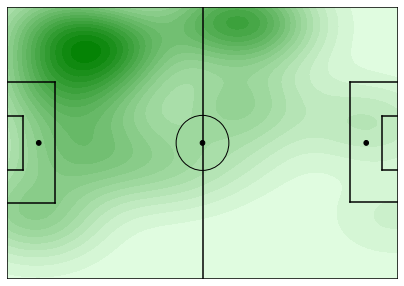

In [331]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
sns.kdeplot(CR['x_start'], CR['y_start'], shade = "True", color = 'g', n_levels = 30)
plt.ylim(0, 80) 
plt.xlim(0, 120)
plt.show()

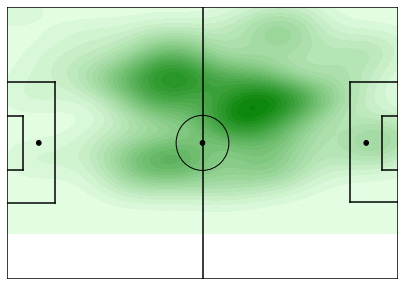

In [332]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
sns.kdeplot(LM['x_start'], LM['y_start'], shade = "True", color = 'g', n_levels = 30)
plt.ylim(0, 80) 
plt.xlim(0, 120)
plt.show()    


In [333]:
%reset -f

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


### Considering only the match Juventus - Napoli played on the 22 April 2018:

### visualize with arrows the starting point and ending point of each pass done during the match by Jorginho and Miralem Pjanic. 

Is there a huge difference between the map with all the passes done and the one with only accurate passes? Comment the results and point out the main differences.

In [334]:
import pandas as pd 
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch

In [335]:
italy_matches=pd.read_json("./Dataset/matches/matches_Italy.json")

In [336]:
italy_matches.head(3)

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329


# 1 - GET Juventus - Napoli played on the 22 April 2018


In [337]:
italy_matches["dateutc"][:5]

0    2018-05-20 18:45:00
1    2018-05-20 18:45:00
2    2018-05-20 16:00:00
3    2018-05-20 16:00:00
4    2018-05-20 16:00:00
Name: dateutc, dtype: object

In [338]:
#removing time 
italy_matches["dateutc"]=pd.to_datetime(italy_matches["dateutc"]).dt.normalize()
#to change only the appearance to yy/mm/dd only

In [339]:
italy_matches["dateutc"][:5]

0   2018-05-20
1   2018-05-20
2   2018-05-20
3   2018-05-20
4   2018-05-20
Name: dateutc, dtype: datetime64[ns]

In [340]:
#match info Juventus - Napoli played on the 22 April 2018
theMatch= italy_matches[italy_matches['dateutc'].isin(['2018-04-22'])]
theMatch= theMatch[theMatch['label'].str.contains('Juventus')]
#theMatch=theMatch.rename(columns={'wyId': 'matchId'})

In [341]:
theMatch

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
41,524,"April 22, 2018 at 8:45:00 PM GMT+2",2018-04-22,Regular,34,"Juventus - Napoli, 0 - 1","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",,3187,2576295


# GET The  passes in that ^ game only

In [342]:
events = pd.read_json("./Dataset/events/events_Italy.json")


In [343]:
events.head(3)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.530536,180423957,2575959,1H,8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",85,Simple pass,[{'id': 1801}],3158
1,8,Pass,3.768418,180423958,2575959,1H,20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",85,Simple pass,[{'id': 1801}],3158
2,7,Others on the ball,4.868265,180423959,2575959,1H,8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",72,Touch,[],3158


In [344]:
#passes only on that Juventus - Napoli match 
#event[matchId],theMathc[wyId]
thePasses=events.loc[events['matchId'].isin(theMatch['wyId'])]


In [345]:
#Only the passes 
thePasses= thePasses[thePasses['eventName'].isin(['Pass'])]

In [346]:
thePasses.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573095,8,Pass,1.265726,245487374,2576295,1H,21385,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 38}]",85,Simple pass,[{'id': 1801}],3187
573096,8,Pass,2.087491,245487375,2576295,1H,3300,"[{'y': 53, 'x': 38}, {'y': 52, 'x': 38}]",85,Simple pass,[{'id': 1801}],3187
573097,8,Pass,3.184110,245487376,2576295,1H,25726,"[{'y': 52, 'x': 38}, {'y': 100, 'x': 82}]",83,High pass,[{'id': 1802}],3187
573100,8,Pass,13.179059,245487370,2576295,1H,20461,"[{'y': 35, 'x': 3}, {'y': 76, 'x': 8}]",85,Simple pass,[{'id': 1801}],3159
573101,8,Pass,15.953909,245487371,2576295,1H,20579,"[{'y': 76, 'x': 8}, {'y': 93, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


# GET Jorginho and Miralem Pjanic info

In [347]:
player=pd.read_json('./Dataset/players.json')

In [348]:
player.head(3)

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230


In [349]:
#tried multipul col to find the name 
Jorginho= player[player['shortName'].str.contains('Jorginho')]
Miralem= player[player['firstName'].str.contains('Miralem')]

In [350]:
Jorginho

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1658,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1991-12-20,3757,3187,Jorge Luiz,right,180,Frello Filho,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Jorginho,65,21315


In [351]:
Miralem

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1482,"{'name': 'Bosnia-Herzegovina', 'id': '70', 'al...",1990-04-02,null,3159,Miralem,right,180,Pjani\u0107,,"{'name': 'Luxembourg', 'id': '442', 'alpha3cod...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Pjani\u0107,74,20443


# filter only the passes that were made by the two players


In [352]:
J_Passes=thePasses[thePasses["playerId"].isin(Jorginho['wyId'])]
M_passes=thePasses[thePasses["playerId"].isin(Miralem['wyId'])]
#M_Passes

In [353]:
J_Passes.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187
573237,8,Pass,456.587989,245487506,2576295,1H,21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",85,Simple pass,[{'id': 1801}],3187


In [354]:
M_passes.head(5)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159


# The passes which are Points and decompose it

In [355]:
 M_passes.positions[:1]

573105    [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
Name: positions, dtype: object

In [356]:
Mpoints= M_passes.positions.apply(pd.Series)


In [357]:
Mpoints=pd.DataFrame(Mpoints)

In [358]:
Mpoints.head(3)

,0,1
573105,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}"
573107,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}"
573126,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}"


In [359]:
Mpoints.columns=["Start_M", "End_M"]
Mpoints.head(3)

,Start_M,End_M
573105,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}"
573107,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}"
573126,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}"


In [360]:
M_passes=pd.concat([Mpoints,M_passes], axis=1)

In [361]:
M_passes.head(3)

,Start_M,End_M,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573105,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}",8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
573107,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}",8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
573126,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}",8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159


In [362]:
Jpoints=J_Passes.positions.apply(pd.Series)

In [363]:
Jpoints=pd.DataFrame(Jpoints)


In [364]:
Jpoints.columns=["Start_J", "End_J"]
Jpoints.head(5)

,Start_J,End_J
573145,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}"
573164,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}"
573188,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}"
573231,"{'y': 28, 'x': 57}","{'y': 33, 'x': 77}"
573237,"{'y': 25, 'x': 61}","{'y': 13, 'x': 74}"


In [365]:
J_Passes=pd.concat([Jpoints,J_Passes], axis=1)

In [366]:
J_Passes.head(4)

,Start_J,End_J,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
573145,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}",8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187
573164,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}",8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187
573188,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}",8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187
573231,"{'y': 28, 'x': 57}","{'y': 33, 'x': 77}",8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187


# the accurate passes for J_Passes [Jorginho ]

In [367]:
q = [] 
for i in range(len(J_Passes)): 
    q.append(J_Passes.iloc[i, 12]) 
        
is_correct = [] 
for i in range(len(q)):
    for j in range(len(q[i])):
        d = q[i][j]
        if d['id'] == 1801 or  d['id'] == 1802 :
            is_correct.append(d['id'])

J_Passes['PassResult'] = is_correct

In [368]:
J_Passes.head(3)

,Start_J,End_J,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,PassResult
573145,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}",8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187,1801
573164,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}",8,Pass,206.466357,245487433,2576295,1H,21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",82,Head pass,"[{'id': 1401}, {'id': 1802}]",3187,1802
573188,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}",8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187,1801


In [369]:
J_won_pass=J_Passes.loc[J_Passes["PassResult"]==1801]
#1801 won
#df.loc[df['column_name'] == some_value]


In [370]:
J_won_pass.head(3)

,Start_J,End_J,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,PassResult
573145,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}",8,Pass,166.338197,245487404,2576295,1H,21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",85,Simple pass,[{'id': 1801}],3187,1801
573188,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}",8,Pass,250.114192,245487461,2576295,1H,21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",85,Simple pass,[{'id': 1801}],3187,1801
573231,"{'y': 28, 'x': 57}","{'y': 33, 'x': 77}",8,Pass,446.557147,245487500,2576295,1H,21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",85,Simple pass,[{'id': 1801}],3187,1801


# The accurate M_passes [ Miralem Pjanic]

In [371]:
q = [] 
for i in range(len(M_passes)): 
    q.append(M_passes.iloc[i, 12]) 
        
is_correct = [] 
for i in range(len(q)):
    for j in range(len(q[i])):
        d = q[i][j]
        if d['id'] == 1801 or  d['id'] == 1802 :
            is_correct.append(d['id'])

M_passes['PassResult'] = is_correct

In [372]:
M_passes.head(3)


,Start_M,End_M,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,PassResult
573105,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}",8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159,1801
573107,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}",8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159,1801
573126,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}",8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159,1801


In [373]:
M_won_pass=M_passes.loc[M_passes["PassResult"]==1801]
#get the correct ones only

In [374]:
M_won_pass.head(6)

,Start_M,End_M,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,PassResult
573105,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}",8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159,1801
573107,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}",8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159,1801
573126,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}",8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159,1801
573225,"{'y': 51, 'x': 26}","{'y': 76, 'x': 13}",8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159,1801
573234,"{'y': 62, 'x': 21}","{'y': 82, 'x': 30}",8,Pass,450.950633,245487528,2576295,1H,20443,"[{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]",85,Simple pass,[{'id': 1801}],3159,1801
573247,"{'y': 36, 'x': 17}","{'y': 22, 'x': 13}",8,Pass,475.666889,245487536,2576295,1H,20443,"[{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159,1801


# Drawing the pitch¶

In [375]:
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

# Miralem Pjanic all passes

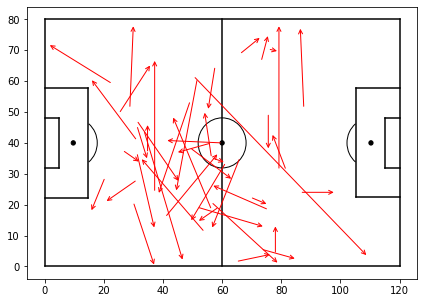

In [376]:
fig_M=plt.figure()
fig_M.set_size_inches(7, 5)
ax=fig_M.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#start with J passes >> tottal passes
#        Start_M              End_M
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(M_passes)):
    ax.annotate("", xy = (M_passes.iloc[i]['End_M']['x']*120/100,
                          M_passes.iloc[i]['End_M']['y']*80/100), 
                xycoords = 'data',
                xytext = (M_passes.iloc[i]['Start_M']['x']*120/100, 
                          M_passes.iloc[i]['Start_M']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
#__________________________________
plt.show()

#  Miralem Pjanic Accurate passes

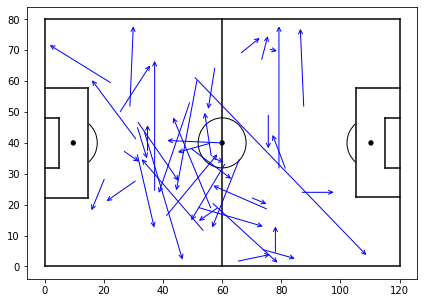

In [377]:
fig_M_won=plt.figure()
fig_M_won.set_size_inches(7, 5)
ax=fig_M_won.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#        Start           End
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(M_won_pass)):
    ax.annotate("", xy = (M_won_pass.iloc[i]['End_M']['x']*120/100,
                          M_won_pass.iloc[i]['End_M']['y']*80/100), 
                xycoords = 'data',
                xytext = (M_won_pass.iloc[i]['Start_M']['x']*120/100, 
                          M_won_pass.iloc[i]['Start_M']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
#__________________________________
plt.show()

# Comparinng both accurate and total passes Miralem Pjanic 

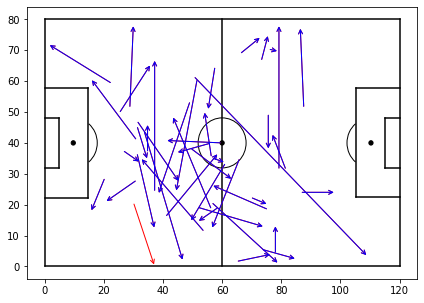

In [378]:
figM=plt.figure()
figM.set_size_inches(7, 5)
ax=figM.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#        Start             End
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(M_passes)):
    ax.annotate("", xy = (M_passes.iloc[i]['End_M']['x']*120/100,
                          M_passes.iloc[i]['End_M']['y']*80/100), 
                xycoords = 'data',
                xytext = (M_passes.iloc[i]['Start_M']['x']*120/100, 
                          M_passes.iloc[i]['Start_M']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
#__________________________________
for i in range(len(M_won_pass)):
    ax.annotate("", xy = (M_won_pass.iloc[i]['End_M']['x']*120/100,
                          M_won_pass.iloc[i]['End_M']['y']*80/100), 
                xycoords = 'data',
                xytext = (M_won_pass.iloc[i]['Start_M']['x']*120/100, 
                          M_won_pass.iloc[i]['Start_M']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
#__________________________________
plt.show()

The blue arrows shows the accurate passes that were made by the palyer Miralem Pjanic
while the red represents a number of  Total passes that were not accurate , as seen most of this player passes were correct except for one unaccurate pass

# Jorginho all passes

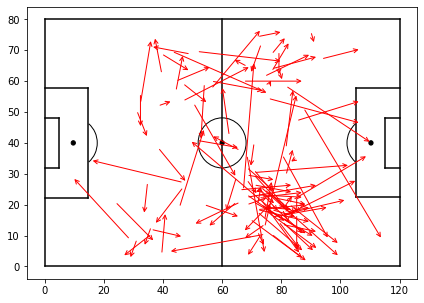

In [379]:
fig_j=plt.figure()
fig_j.set_size_inches(7, 5)
ax=fig_j.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#        Start              End
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(J_Passes)):
    ax.annotate("", xy = (J_Passes.iloc[i]['End_J']['x']*120/100,
                          J_Passes.iloc[i]['End_J']['y']*80/100), 
                xycoords = 'data',
                xytext = (J_Passes.iloc[i]['Start_J']['x']*120/100, 
                          J_Passes.iloc[i]['Start_J']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
#__________________________________
plt.show()

# Jorginho only the accurate passes 

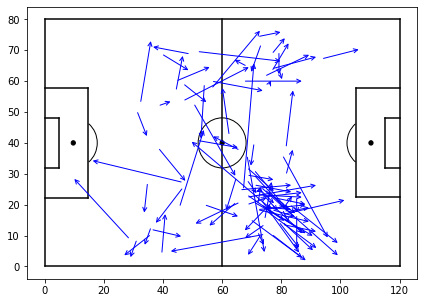

In [380]:
fig_j_won=plt.figure()
fig_j_won.set_size_inches(7, 5)
ax=fig_j_won.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#        Start             End
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(J_won_pass)):
    ax.annotate("", xy = (J_won_pass.iloc[i]['End_J']['x']*120/100,
                          J_won_pass.iloc[i]['End_J']['y']*80/100), 
                xycoords = 'data',
                xytext = (J_won_pass.iloc[i]['Start_J']['x']*120/100, 
                          J_won_pass.iloc[i]['Start_J']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
#__________________________________
plt.show()

# compare both Jorginho passes

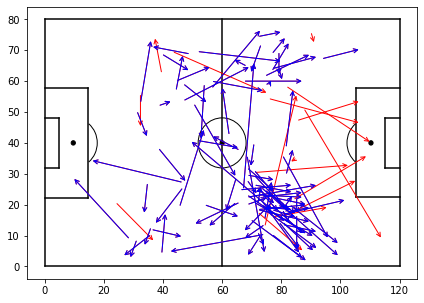

In [381]:
fig2=plt.figure()
fig2.set_size_inches(7, 5)
ax=fig2.add_subplot(1,1,1)
draw_pitch(ax)
#____________________________________
#        Start             End
# [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
# annotate draw an arrow from a current position to pass_end_location
for i in range(len(J_Passes)):
    ax.annotate("", xy = (J_Passes.iloc[i]['End_J']['x']*120/100,
                          J_Passes.iloc[i]['End_J']['y']*80/100), 
                xycoords = 'data',
                xytext = (J_Passes.iloc[i]['Start_J']['x']*120/100, 
                          J_Passes.iloc[i]['Start_J']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
#__________________________________
for i in range(len(J_won_pass)):
    ax.annotate("", xy = (J_won_pass.iloc[i]['End_J']['x']*120/100,
                          J_won_pass.iloc[i]['End_J']['y']*80/100), 
                xycoords = 'data',
                xytext = (J_won_pass.iloc[i]['Start_J']['x']*120/100, 
                          J_won_pass.iloc[i]['Start_J']['y']*80/100), 
                textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
#__________________________________
plt.show()

The blue arrows shows the accurate passes that were made by the palyer Jorginho
while the red represents the number of Total passes that were not accurate , as seen there are some passes that were not acccurate compared to the first player  Miralem Pjanic who had less unaccurate passes 